In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot 
import statsmodels.api as sm 
from sklearn.metrics import mean_squared_error 

In [2]:
df=pd.read_csv("ToyotaCorolla.csv", encoding="latin1")
print(df.shape)
df.head()

(1436, 38)


,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [3]:
df=df.drop("Id", axis=1)
df 

,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,...,1,1,1,0,0,0,1,0,0,0
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,...,1,0,1,0,0,0,1,0,0,0
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,...,0,0,1,0,0,0,1,0,0,0
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,...,0,0,1,0,0,0,1,0,0,0
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,Blue,...,1,1,1,0,1,1,1,0,0,0
1432,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,Grey,...,0,0,1,0,0,1,1,0,0,0
1433,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,Blue,...,0,0,1,0,0,0,1,0,0,0
1434,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,Grey,...,0,0,0,0,0,0,1,0,0,0


In [4]:
df1=df.loc[0:,["Price", "Age_08_04", "KM", "HP", "cc", "Doors", "Gears", "Quarterly_Tax", "Weight"]]
print(df1.shape)
df1.head()

(1436, 9)


,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [5]:
df1=df1.rename(columns= {"Price" : "price", "Age_08_04":"age", "KM":"km", "HP": "hp", 
                         "cc": "cc","Doors": "doors", "Gears": "gears", "Quarterly_Tax": "qtax", "Weight":"wt"})
df1.head()

,price,age,km,hp,cc,doors,gears,qtax,wt
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


Check for missing values

In [6]:
df1.isnull().sum()

price    0
age      0
km       0
hp       0
cc       0
doors    0
gears    0
qtax     0
wt       0
dtype: int64

Check for duplicate values

In [7]:
df1.duplicated().sum()

1

In [8]:
df1[df1.duplicated()]

,price,age,km,hp,cc,doors,gears,qtax,wt
113,24950,8,13253,116,2000,5,5,234,1320


In [9]:
df1=df1.drop_duplicates()
df1.shape 

(1435, 9)

Glance at pattern and structure of data

In [10]:
df1.describe()

,price,age,km,hp,cc,doors,gears,qtax,wt
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [11]:
df1.info()
#No feature is categorical-> No OHE needed

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   price   1435 non-null   int64
 1   age     1435 non-null   int64
 2   km      1435 non-null   int64
 3   hp      1435 non-null   int64
 4   cc      1435 non-null   int64
 5   doors   1435 non-null   int64
 6   gears   1435 non-null   int64
 7   qtax    1435 non-null   int64
 8   wt      1435 non-null   int64
dtypes: int64(9)
memory usage: 112.1 KB


## Visualise distribution of data & Outlier detection

## Feature: Price

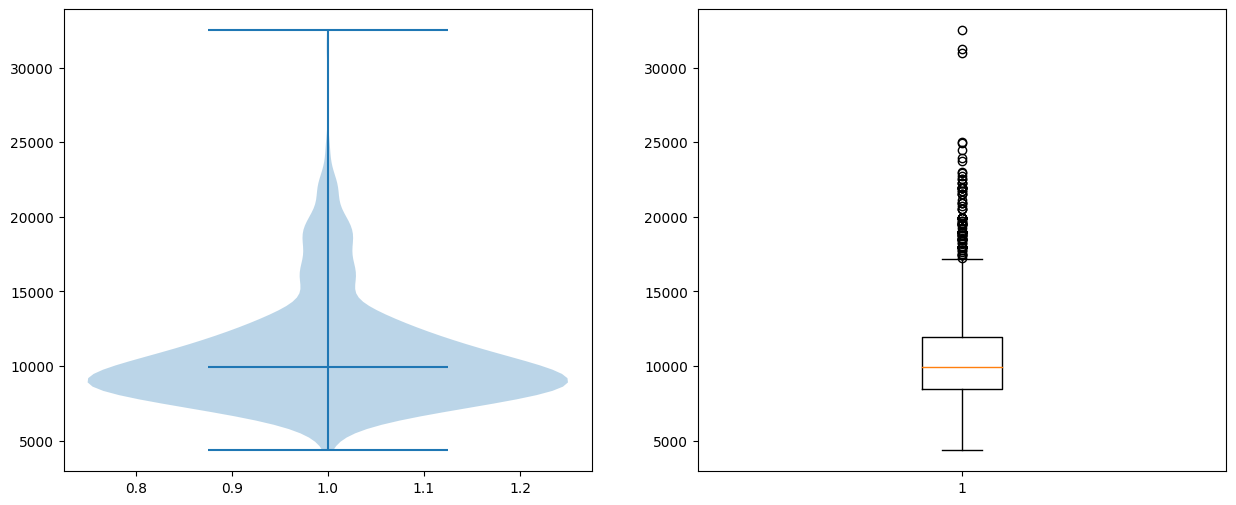

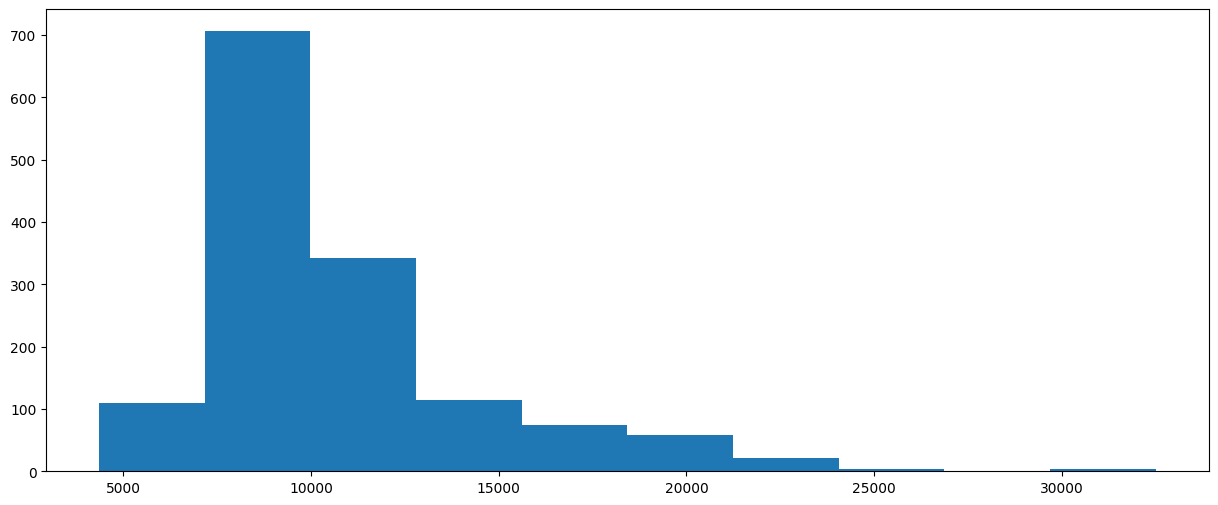

In [12]:
fig = plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.violinplot(df1["price"],showmedians=True)

plt.subplot(1,2,2)
plt.boxplot(df1["price"])
plt.show()

fig = plt.figure(figsize=(15,6))
plt.subplot(1,1,1)
plt.hist(df1.price)
plt.show()

In [13]:
Q1,Q3 = np.percentile(df1.price, [25,75])
IQR = Q3 - Q1
ul = Q3+1.5*IQR
ll = Q1-1.5*IQR
print(Q1,Q3,ll,ul, "\n")

outliers_price = df1.price[(df1.price < ll) |  (df1.price > ul)]
print(outliers_price)

8450.0 11950.0 3200.0 17200.0 

7      18600
8      21500
10     20950
11     19950
12     19600
       ...  
182    21125
183    21500
184    17795
185    18245
523    18950
Name: price, Length: 109, dtype: int64


In [14]:
outliers_price.count()

109

## Feature: Age 

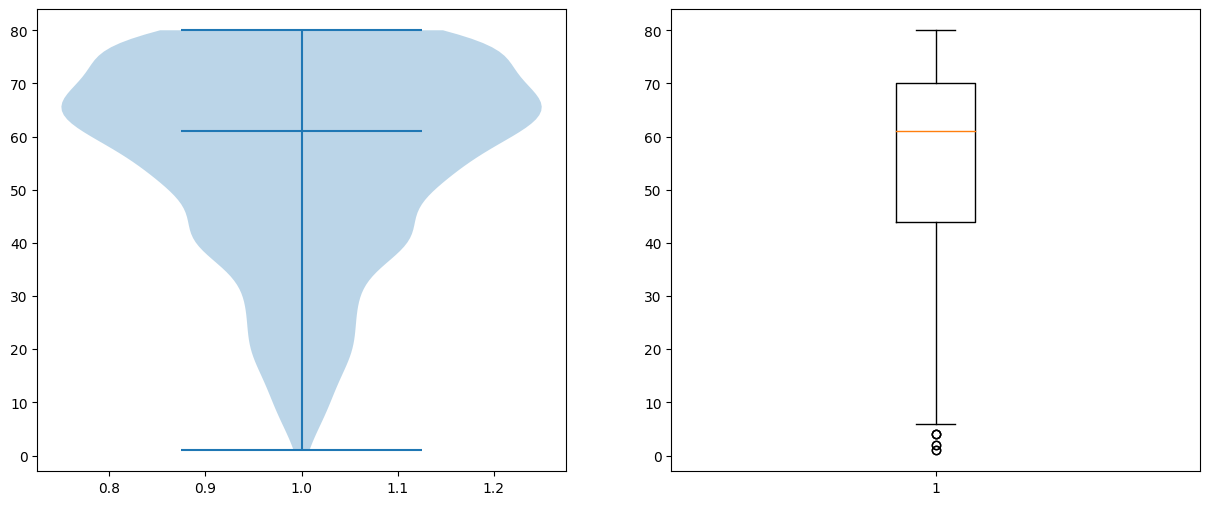

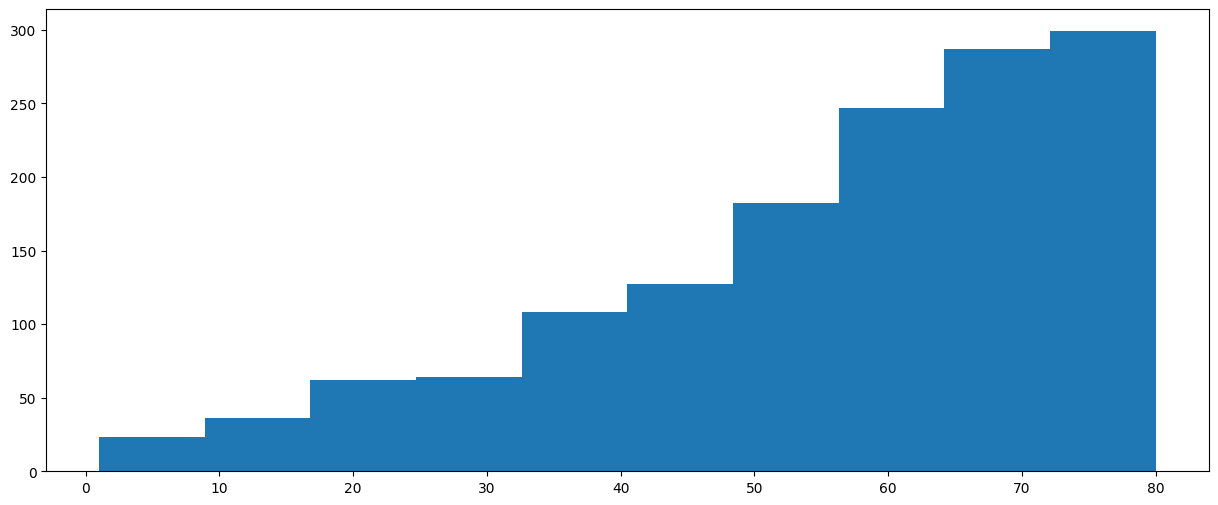

In [15]:
fig = plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.violinplot(df1["age"],showmedians=True)

plt.subplot(1,2,2)
plt.boxplot(df1["age"])
plt.show()

fig = plt.figure(figsize=(15,6))
plt.subplot(1,1,1)
plt.hist(df1.age)
plt.show()

In [16]:
Q1,Q3 = np.percentile(df1.age, [25,75])
IQR = Q3 - Q1
ul = Q3+1.5*IQR
ll = Q1-1.5*IQR
print(Q1,Q3,ll,ul, "\n")

outliers_age = df1.age[(df1.age < ll) |  (df1.age > ul)]
print(outliers_age) 

44.0 70.0 5.0 109.0 

109    4
110    4
111    4
182    2
183    2
184    1
185    1
Name: age, dtype: int64


In [17]:
outliers_age.count()

7

## Feature:km

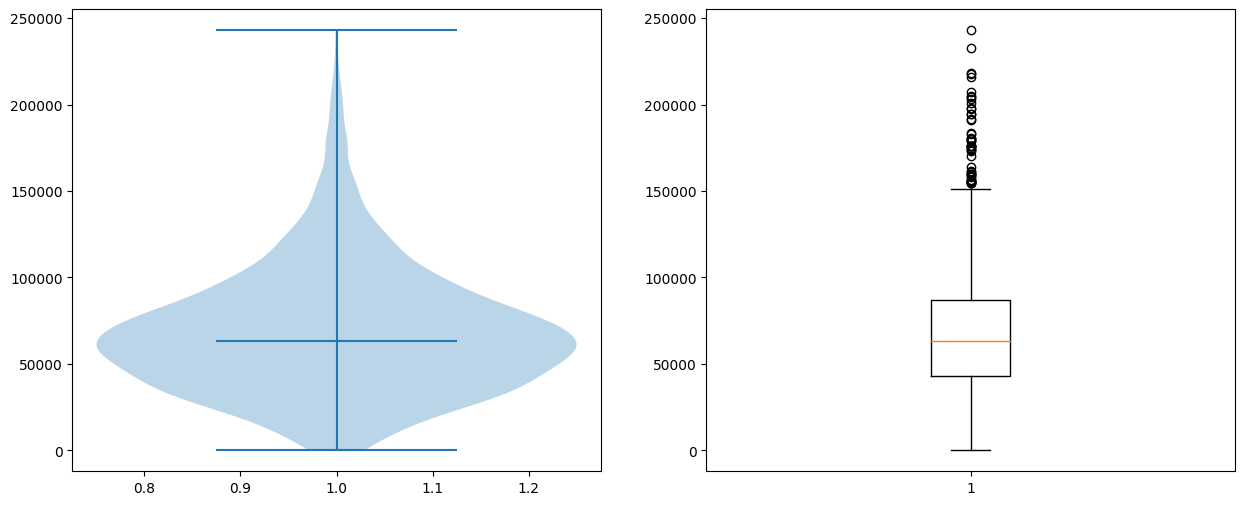

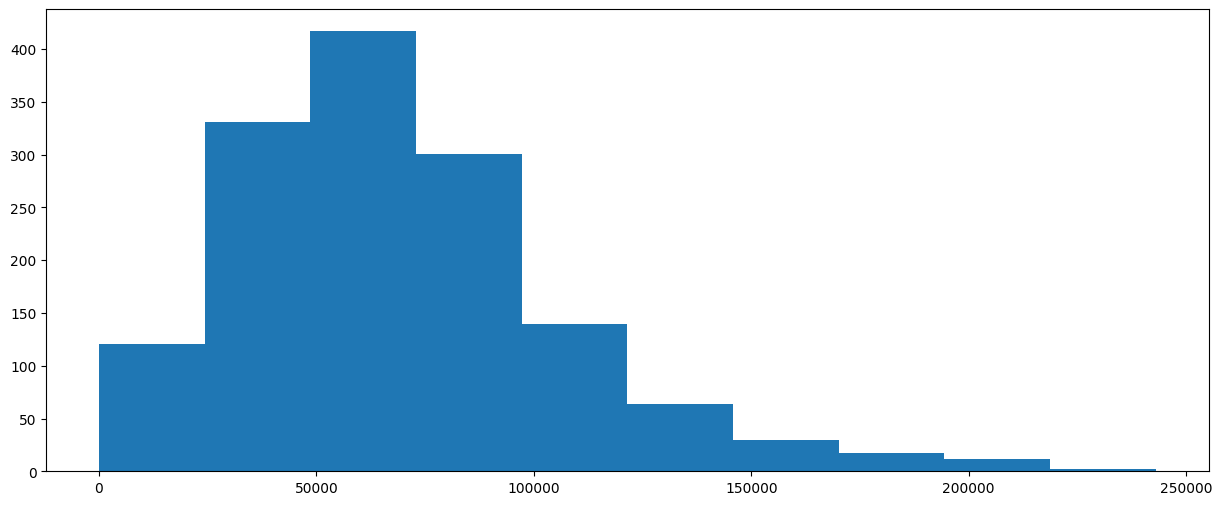

In [18]:
fig = plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.violinplot(df1["km"],showmedians=True)

plt.subplot(1,2,2)
plt.boxplot(df1["km"])
plt.show()

fig = plt.figure(figsize=(15,6))
plt.subplot(1,1,1)
plt.hist(df1.km)
plt.show()

In [19]:
Q1,Q3 = np.percentile(df1.km, [25,75])
IQR = Q3 - Q1
ul = Q3+1.5*IQR
ll = Q1-1.5*IQR
print(Q1,Q3,ll,ul, "\n")

outliers_km = df1.km[(df1.km < ll) |  (df1.km > ul)]
print(outliers_km) 

43000.0 87041.5 -23062.25 153103.75 

186     243000
187     180638
188     179860
189     178858
190     161000
191     158320
378     216000
379     198167
380     176000
381     174139
382     174000
603     205000
604     204250
605     194545
606     190900
607     183500
608     176184
609     174833
610     155720
611     155500
612     154783
613     154462
1044    232940
1045    218118
1046    217764
1047    207114
1048    203254
1049    200732
1050    197501
1051    194765
1052    191620
1053    183277
1054    180378
1055    178800
1056    176177
1057    176000
1058    172980
1059    170000
1060    164000
1061    161775
1062    160000
1063    159968
1064    159908
1065    158492
1066    156204
1067    156169
1068    155210
1069    155000
1070    154900
Name: km, dtype: int64


In [20]:
outliers_km.count()

49

## Feature: hp

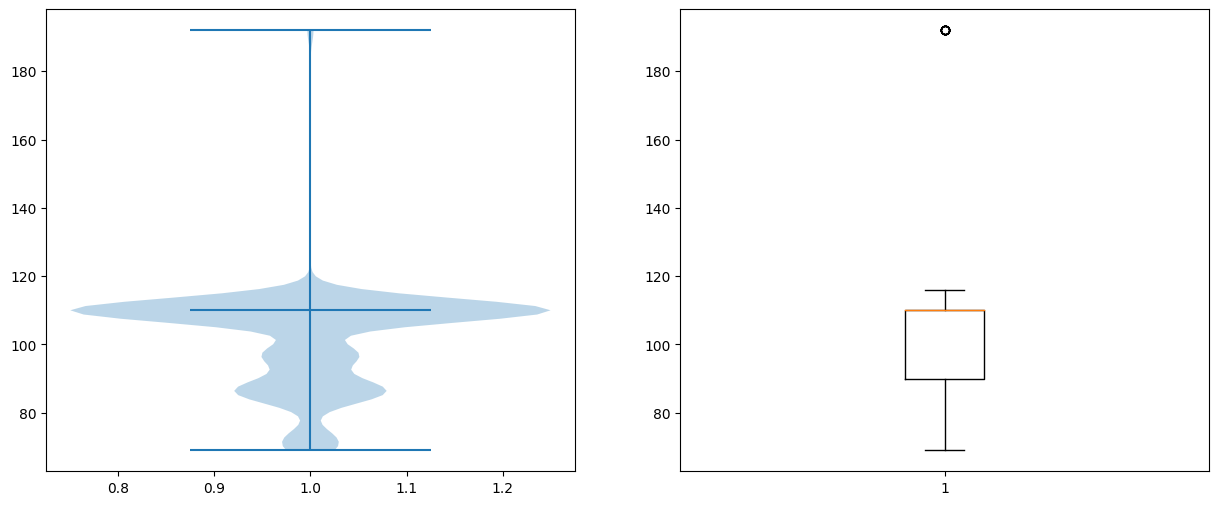

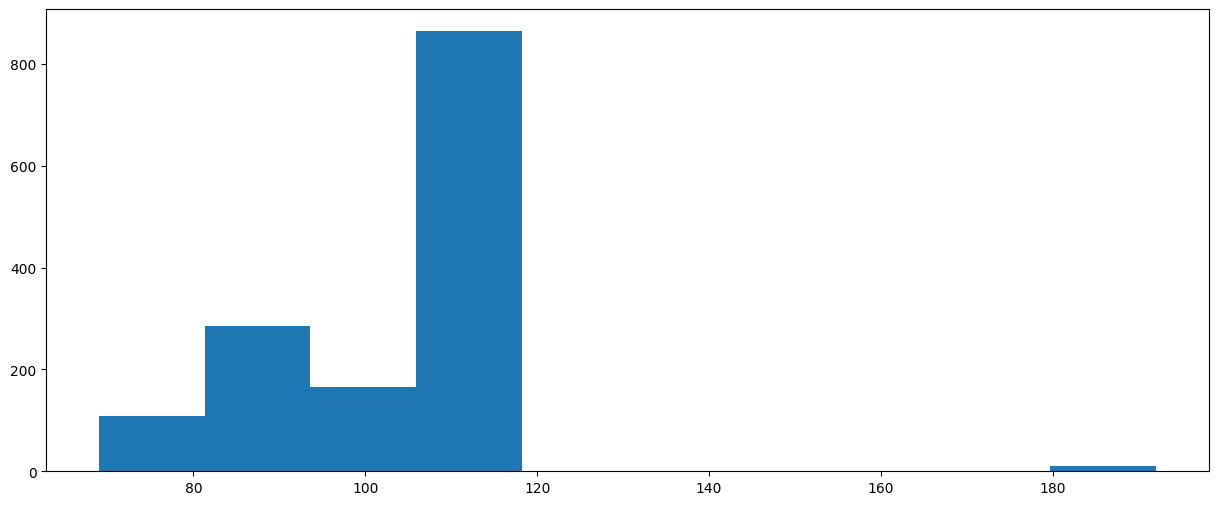

In [21]:
fig = plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.violinplot(df1["hp"],showmedians=True)

plt.subplot(1,2,2)
plt.boxplot(df1["hp"])
plt.show()

fig = plt.figure(figsize=(15,6))
plt.subplot(1,1,1)
plt.hist(df1.hp)
plt.show()

In [22]:
Q1,Q3 = np.percentile(df1.hp, [25,75])
IQR = Q3 - Q1
ul = Q3+1.5*IQR
ll = Q1-1.5*IQR
print(Q1,Q3,ll,ul, "\n")

outliers_hp = df1.hp[(df1.hp < ll) |  (df1.hp > ul)]
print(outliers_hp) 

90.0 110.0 60.0 140.0 

8      192
10     192
11     192
12     192
13     192
14     192
15     192
16     192
49     192
53     192
141    192
Name: hp, dtype: int64


In [23]:
outliers_hp.count()

11

## Feature: cc

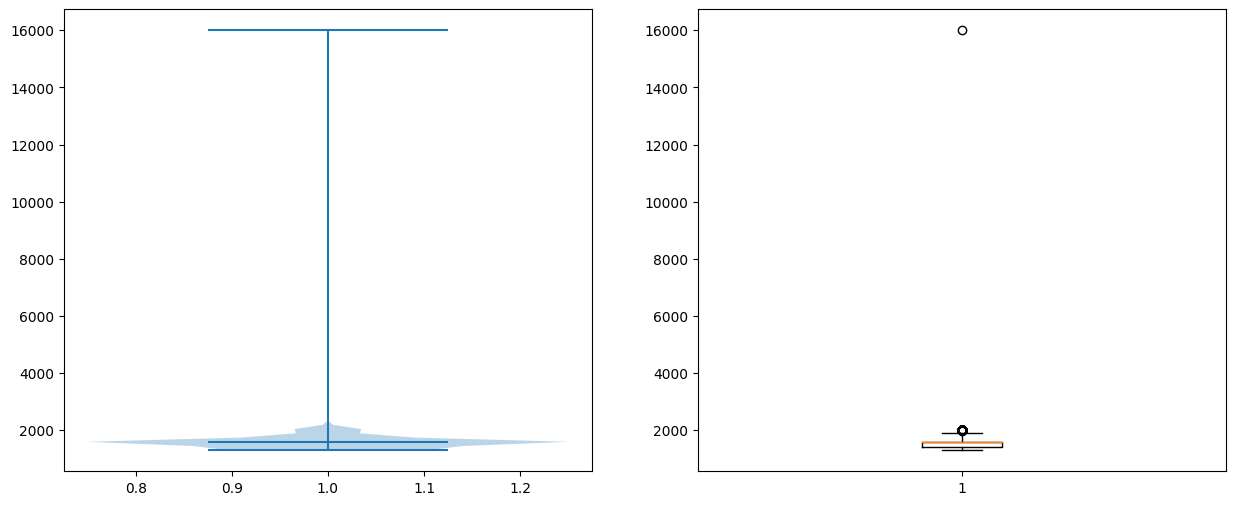

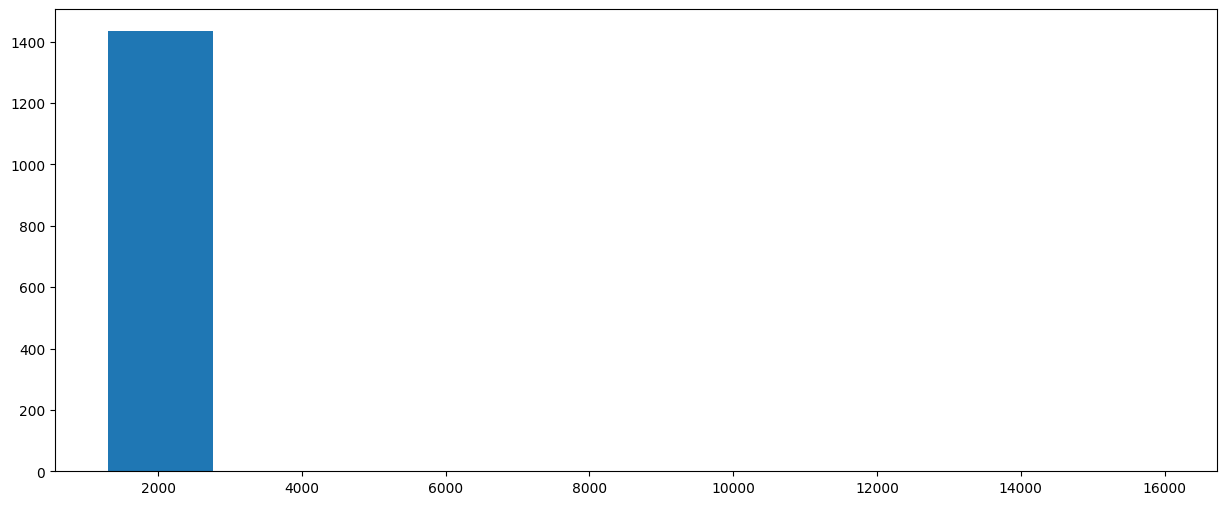

In [24]:
fig = plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.violinplot(df1["cc"],showmedians=True)

plt.subplot(1,2,2)
plt.boxplot(df1["cc"])
plt.show()

fig = plt.figure(figsize=(15,6))
plt.subplot(1,1,1)
plt.hist(df1.cc)
plt.show()

Outlier at 16000 is distorting our plots, hence we remove it. 

In [25]:
df1.cc.idxmax()

80

In [26]:
df1=df1.drop(80)
df1.shape 

(1434, 9)

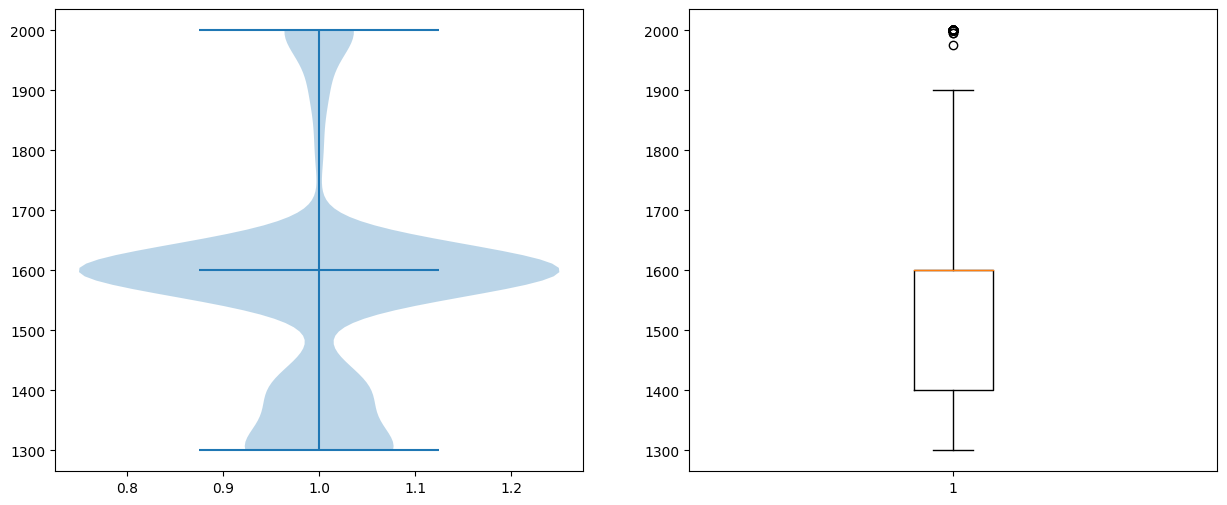

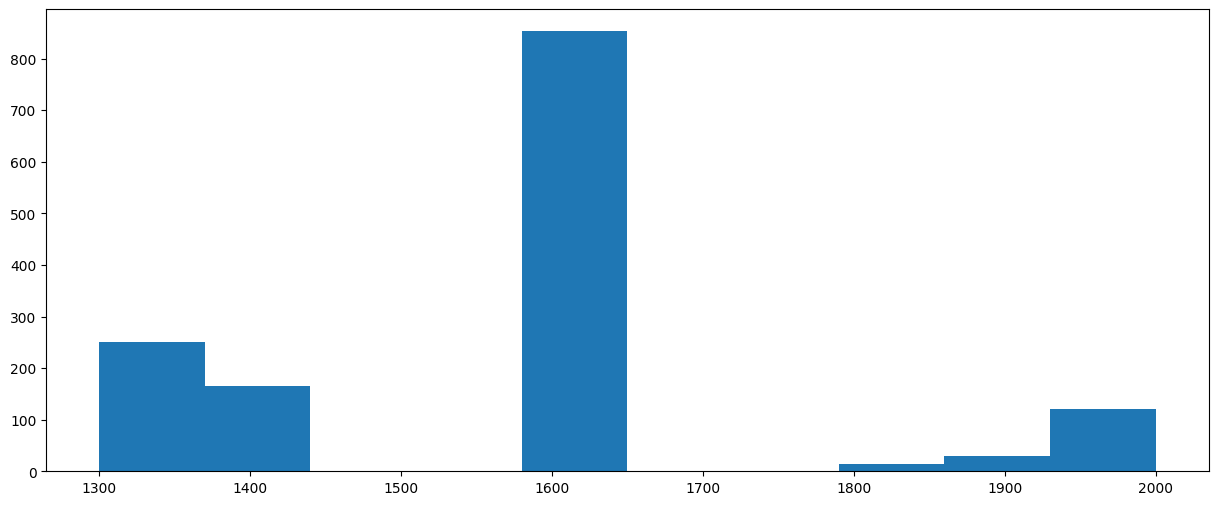

In [27]:
fig = plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.violinplot(df1["cc"],showmedians=True)

plt.subplot(1,2,2)
plt.boxplot(df1["cc"])
plt.show()

fig = plt.figure(figsize=(15,6))
plt.subplot(1,1,1)
plt.hist(df1.cc)
plt.show()

In [28]:
Q1,Q3 = np.percentile(df1.cc, [25,75])
IQR = Q3 - Q1
ul = Q3+1.5*IQR
ll = Q1-1.5*IQR
print(Q1,Q3,ll,ul, "\n")

outliers_cc = df1.cc[(df1.cc < ll) |  (df1.cc > ul)]
print(outliers_cc)

1400.0 1600.0 1100.0 1900.0 

0       2000
1       2000
2       2000
3       2000
4       2000
        ... 
1195    2000
1202    2000
1216    2000
1320    2000
1330    2000
Name: cc, Length: 121, dtype: int64


In [29]:
outliers_cc.count()

121

## Feature: doors

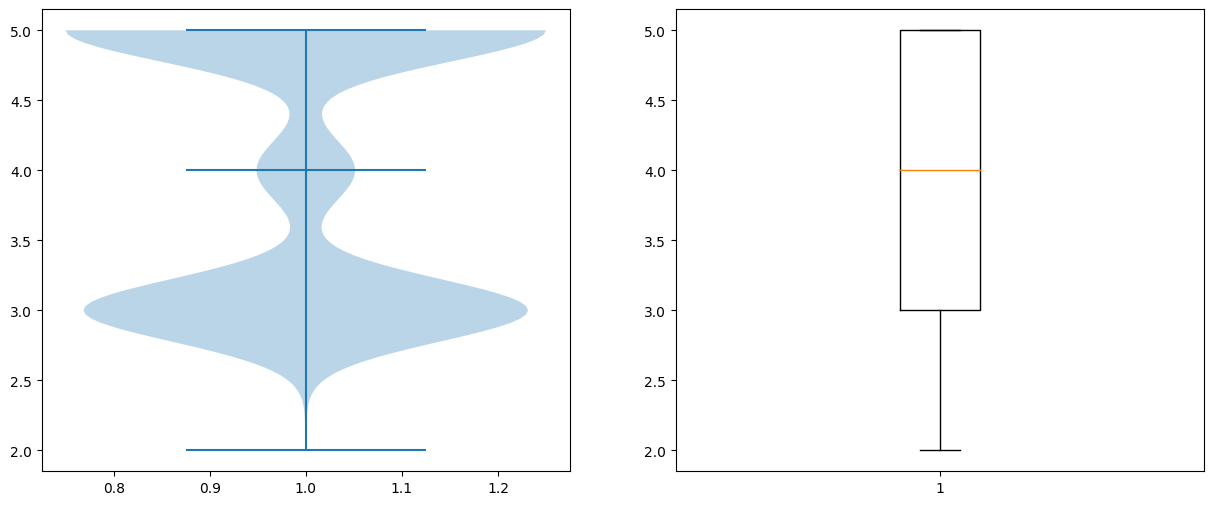

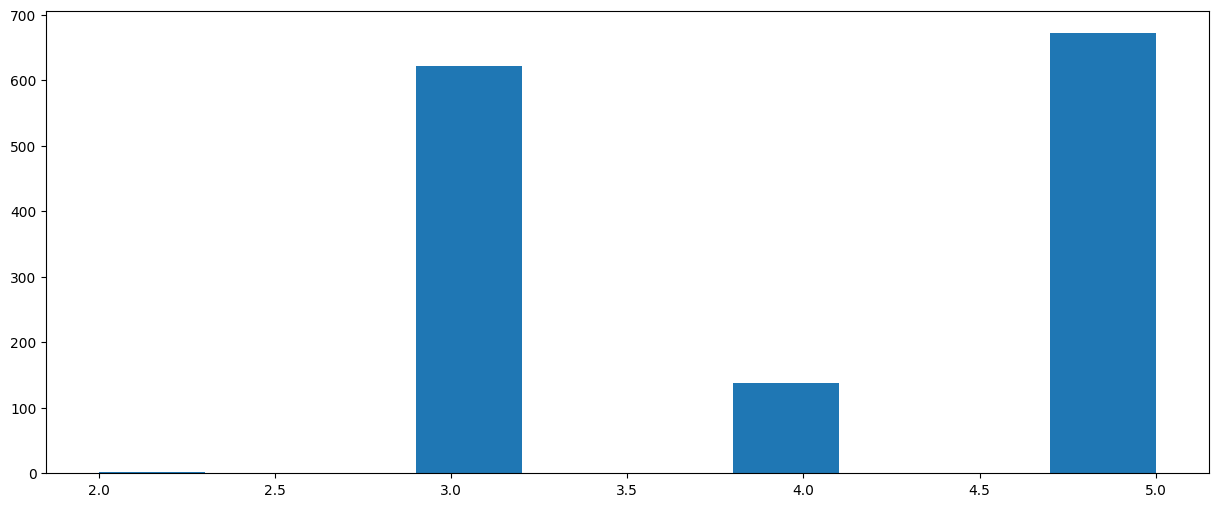

In [30]:
fig = plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.violinplot(df1["doors"],showmedians=True)

plt.subplot(1,2,2)
plt.boxplot(df1["doors"])
plt.show()

fig = plt.figure(figsize=(15,6))
plt.subplot(1,1,1)
plt.hist(df1.doors)
plt.show()

## Feature: gears

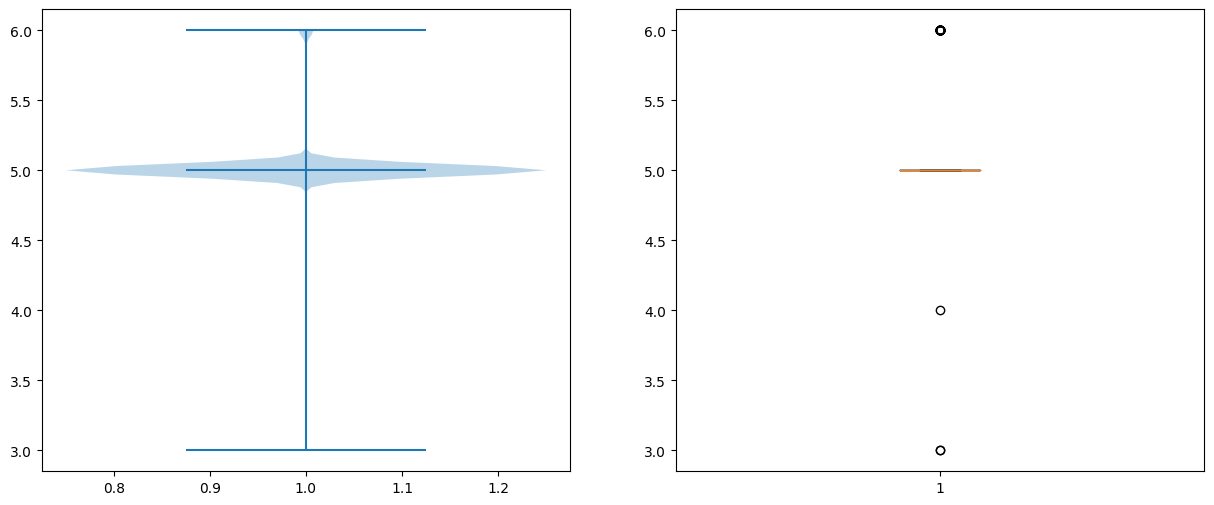

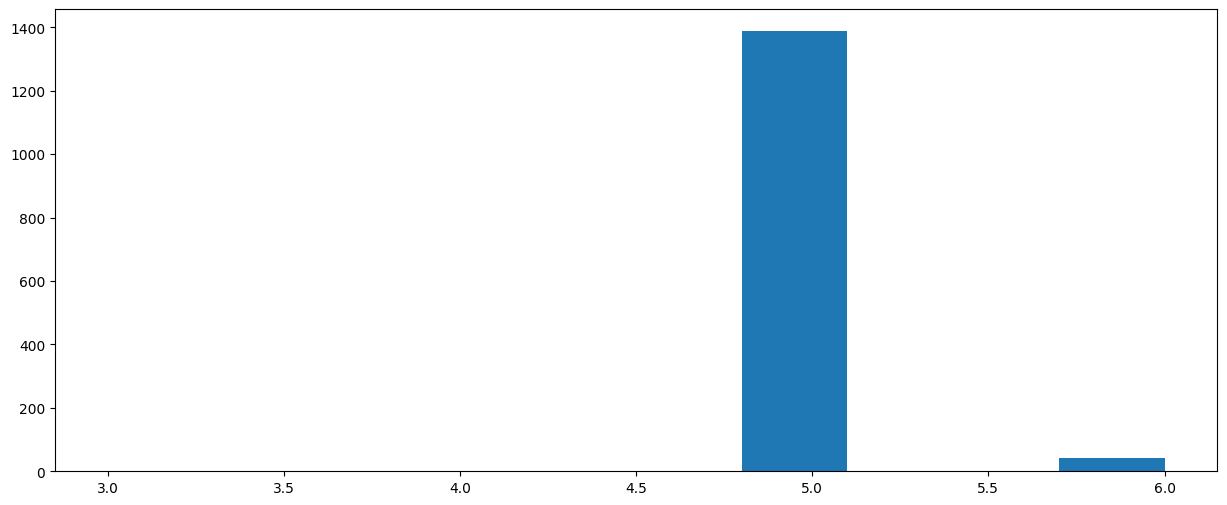

In [31]:
fig = plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.violinplot(df1["gears"],showmedians=True)

plt.subplot(1,2,2)
plt.boxplot(df1["gears"])
plt.show()

fig = plt.figure(figsize=(15,6))
plt.subplot(1,1,1)
plt.hist(df1.gears)
plt.show()

In [32]:
Q1,Q3 = np.percentile(df1.gears, [25,75])
IQR = Q3 - Q1
ul = Q3+1.5*IQR
ll = Q1-1.5*IQR
print(Q1,Q3,ll,ul, "\n")

outliers_gears = df1.gears[(df1.gears < ll) |  (df1.gears > ul)]
print(outliers_gears)

5.0 5.0 5.0 5.0 

10      6
11      6
12      6
13      6
14      6
15      6
49      6
330     6
444     6
461     6
586     6
614     6
618     6
623     6
643     6
659     6
661     6
683     6
691     6
709     6
730     6
741     6
747     6
753     6
786     6
801     6
811     6
827     6
828     6
835     6
838     6
842     6
846     6
873     6
913     6
915     6
920     6
921     6
939     6
956     3
964     6
991     3
1014    6
1015    6
1026    6
1426    4
Name: gears, dtype: int64


In [33]:
outliers_gears.count()

46

## Feature: qtax

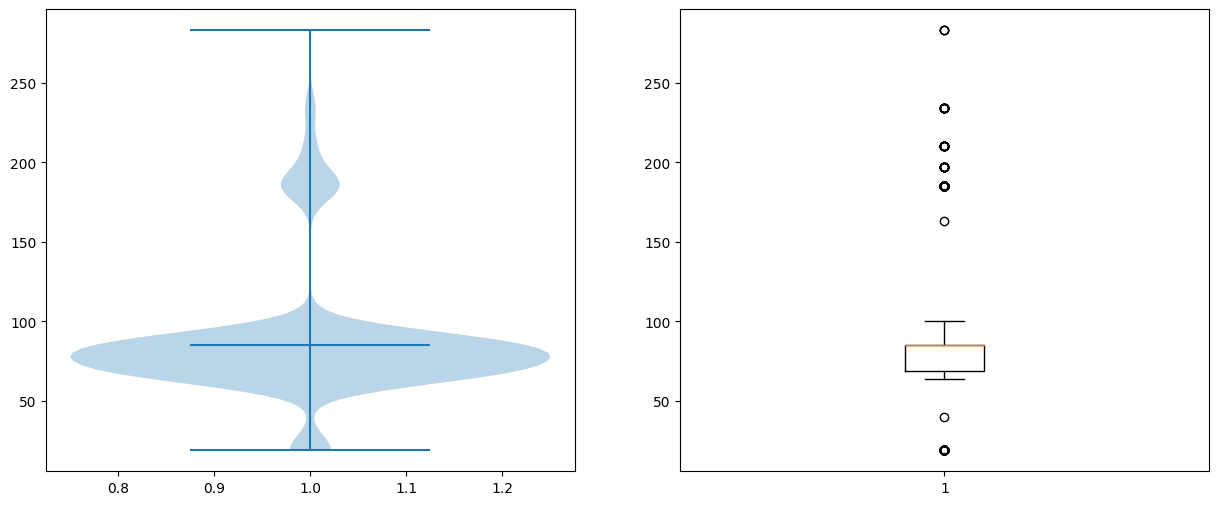

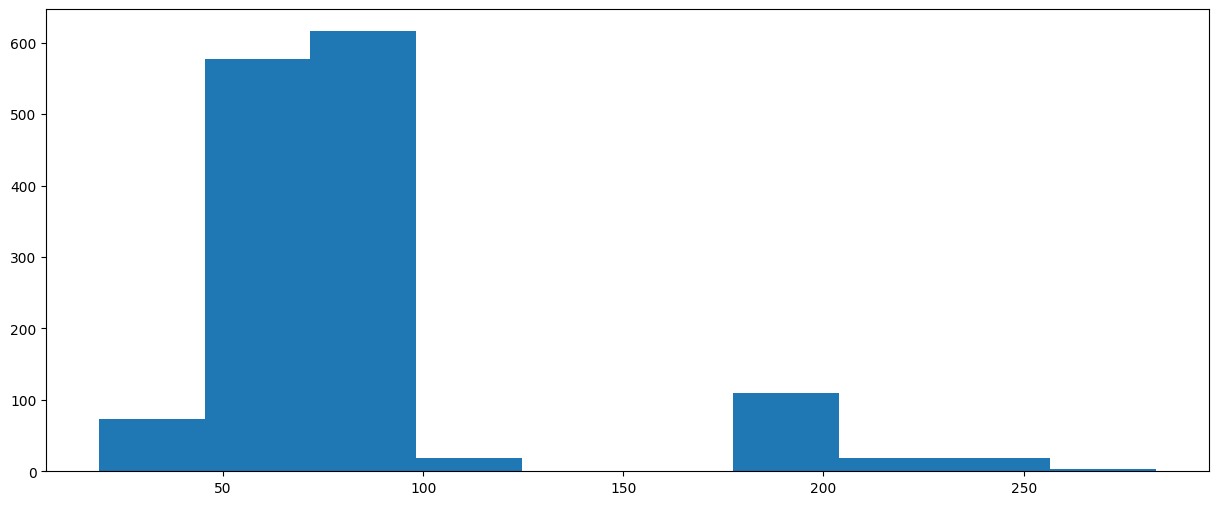

In [34]:
fig = plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.violinplot(df1["qtax"],showmedians=True)

plt.subplot(1,2,2)
plt.boxplot(df1["qtax"])
plt.show()

fig = plt.figure(figsize=(15,6))
plt.subplot(1,1,1)
plt.hist(df1.qtax)
plt.show()

In [35]:
Q1,Q3 = np.percentile(df1.qtax, [25,75])
IQR = Q3 - Q1
ul = Q3+1.5*IQR
ll = Q1-1.5*IQR
print(Q1,Q3,ll,ul, "\n")

outliers_qtax = df1.qtax[(df1.qtax < ll) |  (df1.qtax > ul)]
print(outliers_qtax)

69.0 85.0 45.0 109.0 

0       210
1       210
2       210
3       210
4       210
       ... 
1387     19
1388     19
1416     19
1423     19
1435     19
Name: qtax, Length: 223, dtype: int64


In [36]:
outliers_qtax.count()

223

## Feature: weight

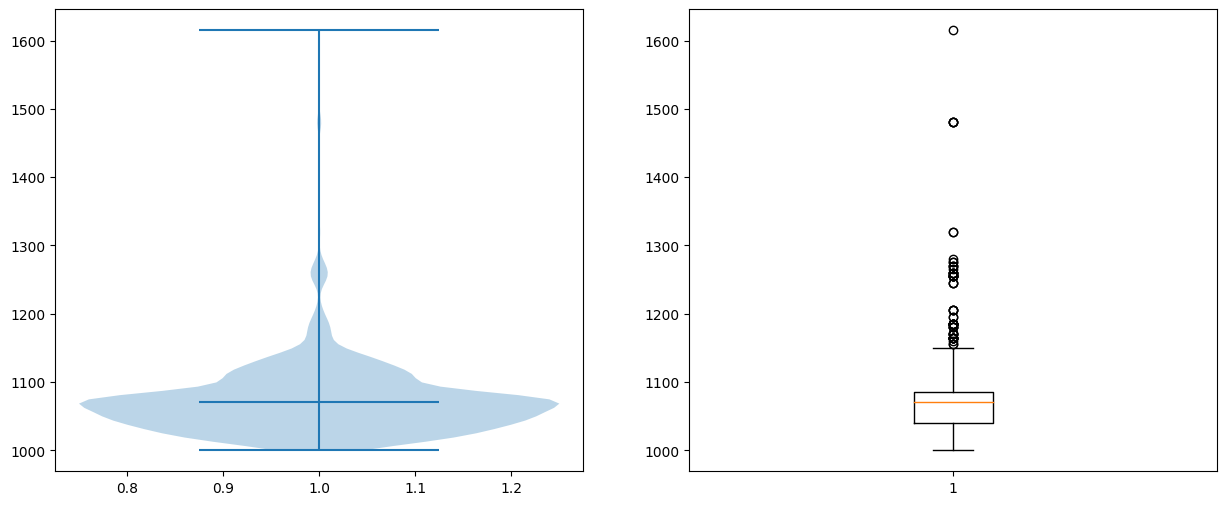

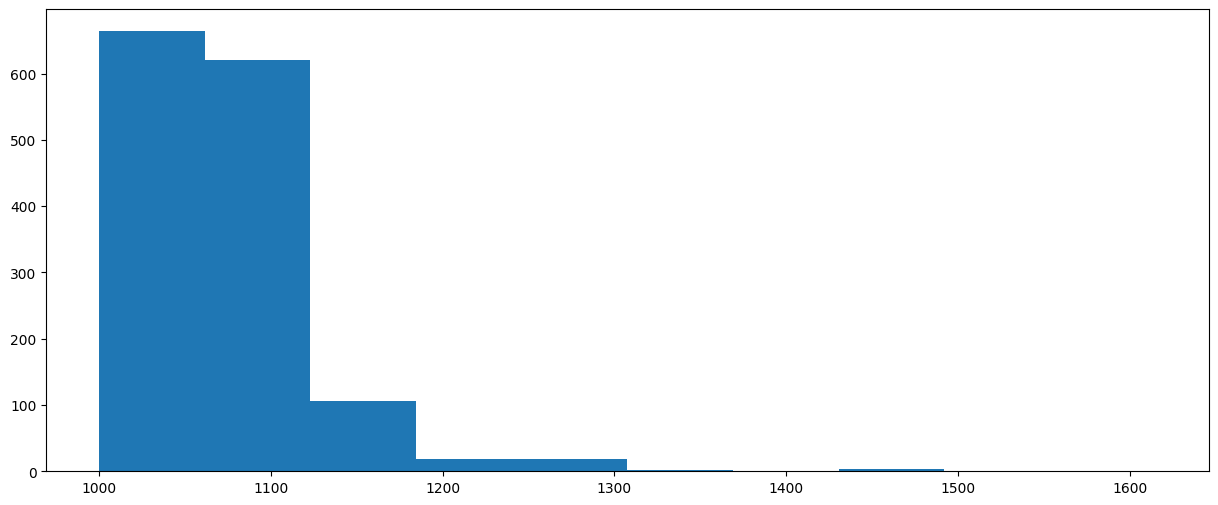

In [37]:
fig = plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.violinplot(df1["wt"],showmedians=True)

plt.subplot(1,2,2)
plt.boxplot(df1["wt"])
plt.show()

fig = plt.figure(figsize=(15,6))
plt.subplot(1,1,1)
plt.hist(df1.wt)
plt.show()

In [38]:
Q1,Q3 = np.percentile(df1.wt, [25,75])
IQR = Q3 - Q1
ul = Q3+1.5*IQR
ll = Q1-1.5*IQR
print(Q1,Q3,ll,ul, "\n")

outliers_wt = df1.wt[(df1.wt < ll) |  (df1.wt > ul)]
print(outliers_wt)

1040.0 1085.0 972.5 1152.5 

0       1165
1       1165
2       1165
3       1165
4       1170
        ... 
601     1260
654     1260
768     1155
960     1480
1044    1172
Name: wt, Length: 64, dtype: int64


In [39]:
outliers_wt.count()

64

## Correlation Matrix

In [40]:
df1.corr()

,price,age,km,hp,cc,doors,gears,qtax,wt
price,1.000000,-0.876059,-0.568724,0.313836,0.159904,0.182385,0.064171,0.211395,0.574483
age,-0.876059,1.000000,0.503851,-0.154800,-0.129482,-0.145941,-0.005799,-0.193144,-0.465226
km,-0.568724,0.503851,1.000000,-0.332623,0.305675,-0.034308,0.014772,0.283774,-0.022152
hp,0.313836,-0.154800,-0.332623,1.000000,0.049366,0.091444,0.209722,-0.302457,0.086464
cc,0.159904,-0.129482,0.305675,0.049366,1.000000,0.125329,0.041015,0.677757,0.650814
doors,0.182385,-0.145941,-0.034308,0.091444,0.125329,1.000000,-0.160060,0.107171,0.300827
gears,0.064171,-0.005799,0.014772,0.209722,0.041015,-0.160060,1.000000,-0.005094,0.021472
qtax,0.211395,-0.193144,0.283774,-0.302457,0.677757,0.107171,-0.005094,1.000000,0.622477
wt,0.574483,-0.465226,-0.022152,0.086464,0.650814,0.300827,0.021472,0.622477,1.000000


Gear has least correlation with price

qtax has high colinearity with cc and wt 

In [41]:
# sns.pairplot(df1)  # Not very useful

### Lets have separate plots for i/p variable vs output

Text(0, 0.5, 'Price')

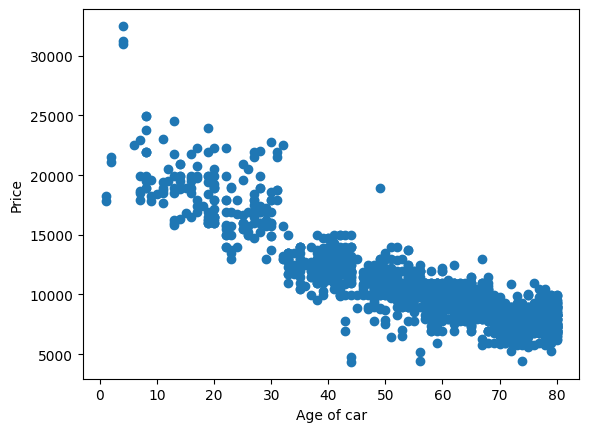

In [42]:
plt.scatter(df1.age, df1.price) # Strong negative relation
plt.xlabel("Age of car")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

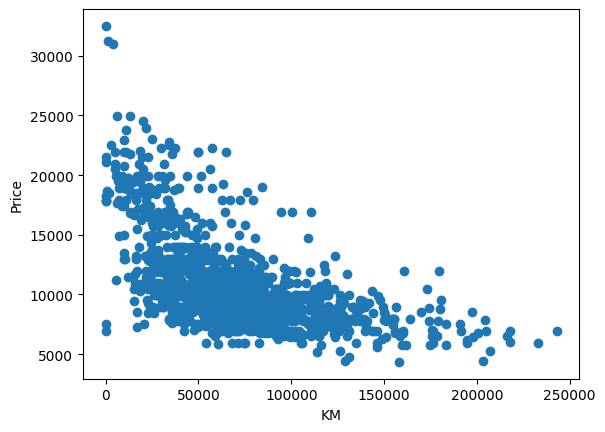

In [43]:
plt.scatter(df1.km, df1.price) # Negative relation
plt.xlabel("KM")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

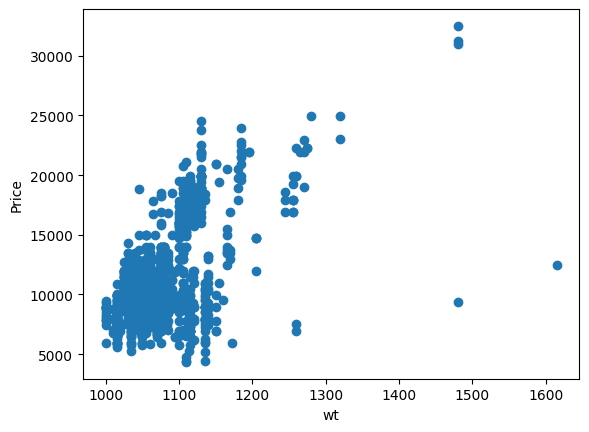

In [44]:
plt.scatter(df1.wt, df1.price)  
plt.xlabel("wt")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

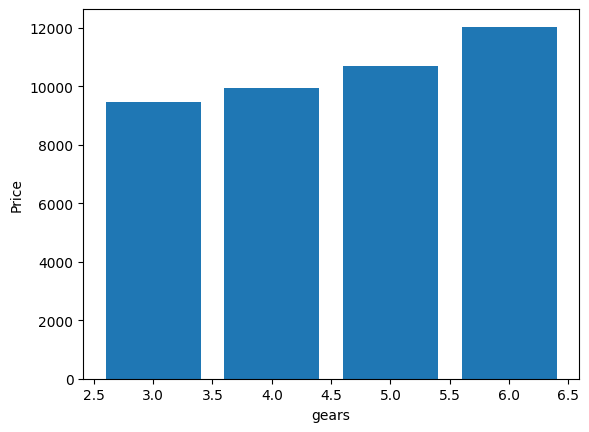

In [45]:
df_vis=df1.groupby('gears').agg('mean') # with no. of gears, average price is increasing

plt.bar(df_vis.index, df_vis.price)
plt.xlabel("gears")
plt.ylabel("Price") 

Text(0.5, 0, 'doors')

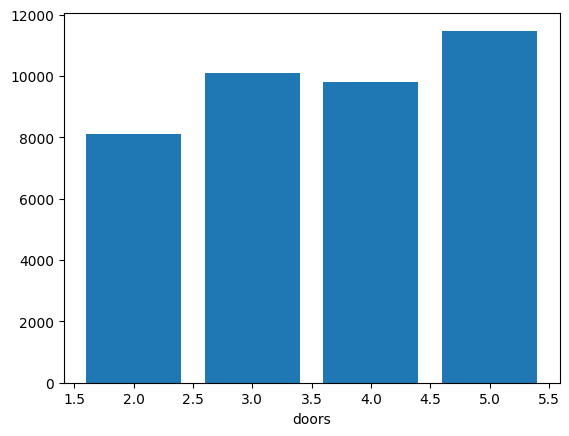

In [46]:
df_vis=df1.groupby('doors').agg('mean') # with no. of doors, average price is more or less increasing

plt.bar(df_vis.index, df_vis.price)
plt.xlabel("doors") 

# 1) Model without outliers 

In [47]:
outliers_age.count() + outliers_cc.count() + outliers_gears.count() + outliers_hp.count() + outliers_km.count() + outliers_price.count() + outliers_qtax.count() + outliers_wt.count()

630

In [48]:
outliers_age.index[0:len(outliers_age)]

Int64Index([109, 110, 111, 182, 183, 184, 185], dtype='int64')

In [49]:
df2=df1.drop(outliers_age.index[0:len(outliers_age)])
df2.shape 

(1427, 9)

In [50]:
df3=df2.drop( outliers_cc.index[0:len(outliers_cc)], errors="ignore") 
df3.shape 

(1309, 9)

In [51]:
df4=df3.drop(outliers_gears.index[0:len(outliers_gears)], errors="ignore") 
df4.shape 

(1263, 9)

In [52]:
df5=df4.drop(outliers_hp.index[0:len(outliers_hp)], errors="ignore")
df5.shape 

(1259, 9)

In [53]:
df6=df5.drop(outliers_km.index[0:len(outliers_km)], errors="ignore")
df6.shape

(1238, 9)

In [54]:
df7=df6.drop(outliers_price.index[0:len(outliers_price)], errors="ignore")
df7.shape 

(1167, 9)

In [55]:
df8=df7.drop(outliers_qtax.index[0:len(outliers_qtax)], errors="ignore")
df8.shape  

(1070, 9)

In [56]:
df9=df8.drop(outliers_wt.index[0:len(outliers_wt)], errors="ignore")
df9.shape  

(1068, 9)

1435 - 1068 = 367

ie 25% of data is removed as outlier

### 1.1) Model with all features

In [57]:
#df9 means df9 with no outliers
ml_df9= smf.ols("price ~ age+km+hp+cc+doors+gears+qtax+wt" , data=df9).fit()  #ALL features

print(ml_df9.rsquared, ml_df9.rsquared_adj)
print(ml_df9.pvalues)

#Qtax has high p value ie 73.8% 

0.8224677782978942 0.8212953957017483
Intercept     3.081706e-05
age          5.313317e-221
km            2.368474e-26
hp            6.159426e-10
cc            2.439752e-13
doors         2.938604e-02
gears         3.081706e-05
qtax          7.381441e-01
wt            1.610802e-27
dtype: float64


In [58]:
ml_df9_pred_y =ml_df9.predict(df9)
ml_df9_rmse =np.sqrt(mean_squared_error(df9.price , ml_df9_pred_y)) 
ml_df9_rmse 

963.688733900014

### 1.2) Model with No Qtax

In [59]:
ml_df9= smf.ols("price ~ age+km+hp+cc+doors+gears+wt" , data=df9).fit() #no qtax

print(ml_df9.rsquared, ml_df9.rsquared_adj)
print(ml_df9.pvalues)
 
# R square adj value improved and no feature having p value more than 5% 

0.8224490497880466 0.8214449916341618
Intercept     1.761570e-06
age          6.738570e-222
km            2.327435e-26
hp            5.984894e-11
cc            1.151233e-14
doors         1.294179e-02
gears         1.761570e-06
wt            1.494415e-43
dtype: float64


Removing Influence points

In [60]:
influence_points=ml_df9.get_influence()
c,p_value= influence_points.cooks_distance 

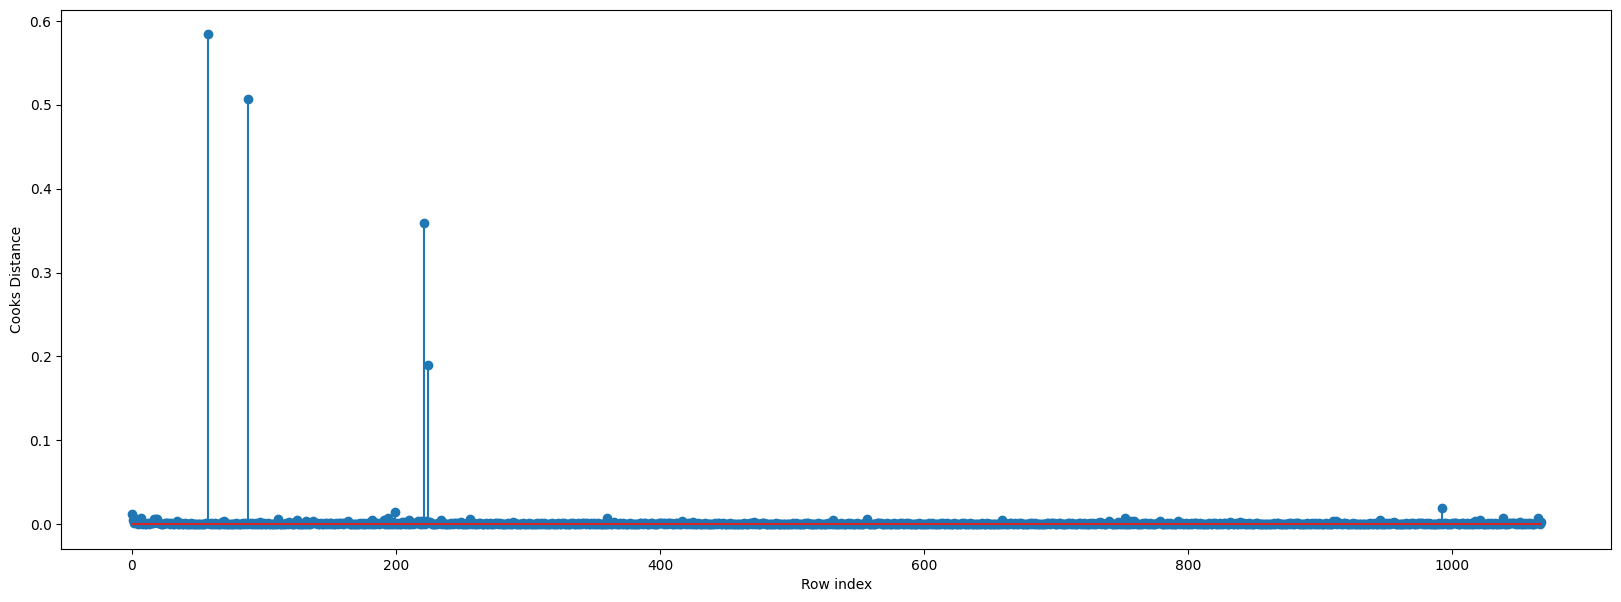

In [61]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df9)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show() 

In [62]:
k = df9.shape[1]
n = df9.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff  

0.028089887640449437

now, in below code, df9  will get modified due to removal of influence points, so lets make a copy of original df9 for future purpose. 

In [63]:
df10=df9.copy()

In [64]:
while np.max(c)>leverage_cutoff:
    ml_df9=smf.ols("price ~ age+km+hp+cc+doors+gears+wt", data=df9).fit() #No Qtax
    (c, p )=ml_df9.get_influence().cooks_distance
    
    np.argmax(c) , np.max(c)
    df9=df9.drop(df9.index[[np.argmax(c)]],axis=0)
    df9=df9.reset_index()
    df9=df9.drop(["index"],axis=1)  

else:
    ml_df9=smf.ols("price ~ age+km+hp+cc+doors+gears+wt", data=df9).fit()
    ml_df9.rsquared_adj
    print("Thus model accuracy is improved to",ml_df9.rsquared_adj) 

Thus model accuracy is improved to 0.8298268384892613


In [65]:
ml_df9= smf.ols("price ~ age+km+hp+cc+doors+gears+wt" , data=df9).fit() #no qtax

print(ml_df9.rsquared, ml_df9.rsquared_adj)
print(ml_df9.pvalues)

0.8307891749351279 0.8298268384892613
Intercept     1.699416e-08
age          3.385716e-211
km            3.153394e-25
hp            8.889393e-03
cc            2.873813e-02
doors         1.470767e-02
gears         1.699416e-08
wt            1.230473e-45
dtype: float64


In [66]:
ml_df9_pred_y =ml_df9.predict(df9)
ml_df9_rmse =np.sqrt(mean_squared_error(df9.price , ml_df9_pred_y)) 
ml_df9_rmse 

936.4990340420871

#### Model without outliers and without feature qtax has R square adj value of 0.8298

## 1.3) Model with No Qtax and Gears

Now df9  is modified while removing influence points, hence df10 = df9.copy() taken in code below.

In [67]:
ml_df10= smf.ols("price ~ age+km+hp+cc+doors+wt" , data=df10).fit()  #NO Gear since it has least correlation
                                                                   #No Qtax since it has high colinearity with cc and wt
print(ml_df10.rsquared, ml_df10.rsquared_adj)
print(ml_df10.pvalues)

#All p values are less than 0.05 

0.8224490497880464 0.8214449916341617
Intercept     1.761570e-06
age          6.738570e-222
km            2.327435e-26
hp            5.984894e-11
cc            1.151233e-14
doors         1.294179e-02
wt            1.494415e-43
dtype: float64


In [68]:
influence_points=ml_df10.get_influence()
c,p_value= influence_points.cooks_distance 

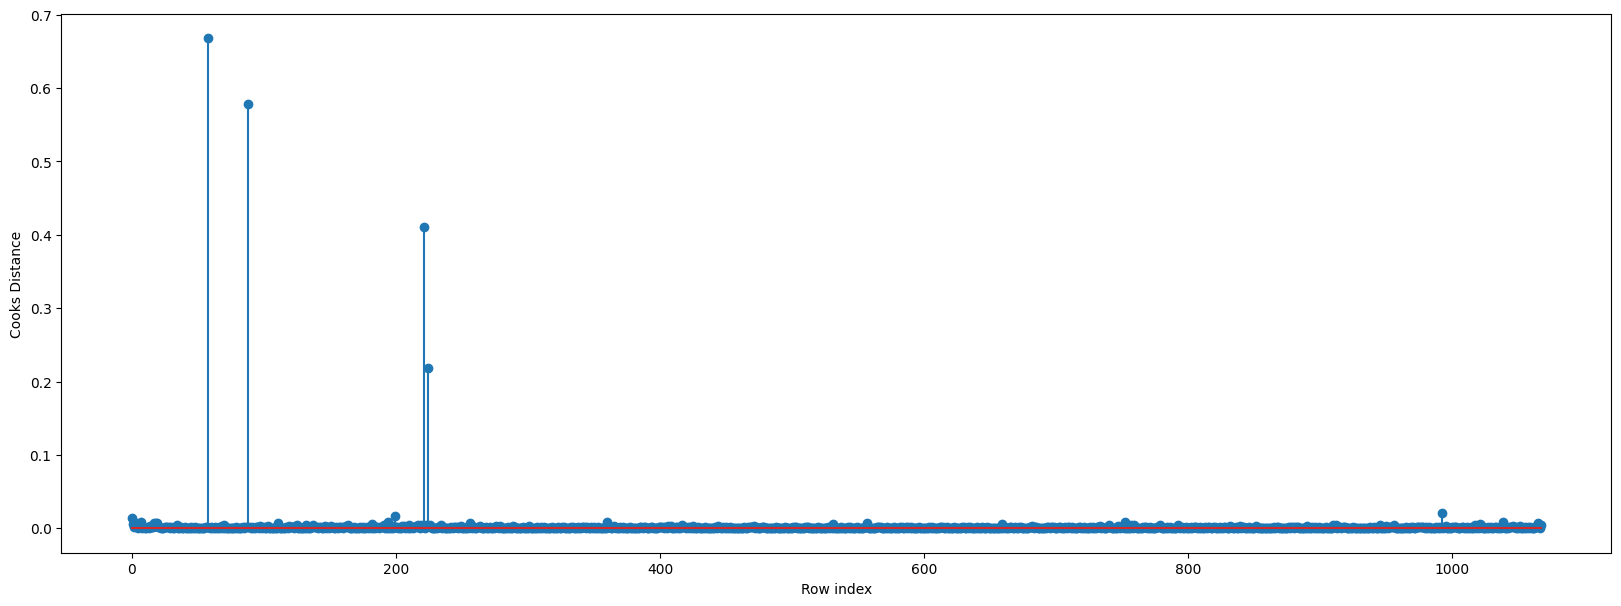

In [69]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df10)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [70]:
k = df10.shape[1]
n = df10.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff 

0.028089887640449437

In [71]:
while np.max(c)>leverage_cutoff:
    ml_df10=smf.ols("price ~ age+km+hp+cc+doors+wt", data=df10 ).fit()
    (c, p )=ml_df10.get_influence().cooks_distance
    
    np.argmax(c) , np.max(c)
    df10=df10.drop(df10.index[[np.argmax(c)]],axis=0)
    df10=df10.reset_index()
    df10=df10.drop(["index"],axis=1)  

else:
    ml_df10=smf.ols("price ~ age+km+hp+cc+doors+wt", data=df10).fit()
    ml_df10.rsquared_adj
    print("Thus model accuracy is improved to",ml_df10.rsquared_adj) 

Thus model accuracy is improved to 0.8317066824541287


In [72]:
ml_df10= smf.ols("price ~ age+km+hp+cc+doors+wt" , data=df10).fit()  #NO Gear since it has least correlation
                                                                   #No Qtax since it has high colinearity with cc and wt
print(ml_df10.rsquared, ml_df10.rsquared_adj)
print(ml_df10.pvalues)

0.8326592861383506 0.8317066824541287
Intercept     3.072642e-09
age          9.437357e-212
km            9.335662e-26
hp            6.709820e-03
cc            2.495447e-02
doors         7.151565e-03
wt            1.388293e-47
dtype: float64


In [73]:
ml_df10_pred_y =ml_df10.predict(df10)
ml_df10_rmse =np.sqrt(mean_squared_error(df10.price , ml_df10_pred_y)) 
ml_df10_rmse 

930.2656084830757

### Model without outliers and without features Qtax and gears has accuracy 0.8317

# 2) Model with some outliers

if we remove all these 630 outliers(in reality 367 outliers, since some rows are outliers in more than 2 features so gets double counted) then

1435 - 367 = 1068

ie 25% of data is removed as outliers_age

Hence we keep outliers which are either large in numbers or are closely spaced to upper limit / lower limit of boxplot

As one can notice, we have take 2.5*IQR instead of 1.5*IQR in order to be lenient on outliers. 

In [74]:
Q1,Q3 = np.percentile(df1.price, [25,75])
IQR = Q3 - Q1
ul = Q3+2.5*IQR
ll = Q1-2.5*IQR
print(Q1,Q3,ll,ul, "\n")

outliers_price = df1.price[(df1.price < ll) |  (df1.price > ul)]
print(outliers_price) 

8450.0 11950.0 -300.0 20700.0 

8      21500
10     20950
13     21500
14     22500
15     22000
16     22750
49     21950
53     21950
68     22250
89     21950
91     22250
109    32500
110    31000
111    31275
112    24950
114    22950
115    24990
116    21950
119    22250
125    21750
138    23000
141    23950
147    24500
149    20950
154    21750
161    20750
167    20950
171    23750
174    21950
178    21950
179    22500
182    21125
183    21500
Name: price, dtype: int64


In [75]:
outliers_price.count() 

33

In [76]:
Q1,Q3 = np.percentile(df1.age, [25,75])
IQR = Q3 - Q1
ul = Q3+2.5*IQR
ll = Q1-2.5*IQR
print(Q1,Q3,ll,ul, "\n")

outliers_age = df1.age[(df1.age < ll) |  (df1.age > ul)]
print(outliers_age) 

44.0 70.0 -21.0 135.0 

Series([], Name: age, dtype: int64)


In [77]:
outliers_age.count() 

0

In [78]:
Q1,Q3 = np.percentile(df1.km, [25,75])
IQR = Q3 - Q1
ul = Q3+2.5*IQR
ll = Q1-2.5*IQR
print(Q1,Q3,ll,ul, "\n")

outliers_km = df1.km[(df1.km < ll) |  (df1.km > ul)]
print(outliers_km) 

43000.0 87062.25 -67155.625 197217.875 

186     243000
378     216000
379     198167
603     205000
604     204250
1044    232940
1045    218118
1046    217764
1047    207114
1048    203254
1049    200732
1050    197501
Name: km, dtype: int64


In [79]:
outliers_km.count() 

12

In [80]:
Q1,Q3 = np.percentile(df1.hp, [25,75])
IQR = Q3 - Q1
ul = Q3+2.5*IQR
ll = Q1-2.5*IQR
print(Q1,Q3,ll,ul, "\n")

outliers_hp = df1.hp[(df1.hp < ll) |  (df1.hp > ul)]
print(outliers_hp) 

90.0 110.0 40.0 160.0 

8      192
10     192
11     192
12     192
13     192
14     192
15     192
16     192
49     192
53     192
141    192
Name: hp, dtype: int64


In [81]:
outliers_hp.count() 

11

In [82]:
Q1,Q3 = np.percentile(df1.cc, [25,75])
IQR = Q3 - Q1
ul = Q3+2.5*IQR
ll = Q1-2.5*IQR
print(Q1,Q3,ll,ul, "\n")

outliers_cc = df1.cc[(df1.cc < ll) |  (df1.cc > ul)]
print(outliers_cc)

1400.0 1600.0 900.0 2100.0 

Series([], Name: cc, dtype: int64)


In [83]:
outliers_cc.count() 

0

In [84]:
Q1,Q3 = np.percentile(df1.gears, [25,75])
IQR = Q3 - Q1
ul = Q3+2.5*IQR
ll = Q1-2.5*IQR
print(Q1,Q3,ll,ul, "\n")

outliers_gears = df1.gears[(df1.gears < ll) |  (df1.gears > ul)]
print(outliers_gears)

5.0 5.0 5.0 5.0 

10      6
11      6
12      6
13      6
14      6
15      6
49      6
330     6
444     6
461     6
586     6
614     6
618     6
623     6
643     6
659     6
661     6
683     6
691     6
709     6
730     6
741     6
747     6
753     6
786     6
801     6
811     6
827     6
828     6
835     6
838     6
842     6
846     6
873     6
913     6
915     6
920     6
921     6
939     6
956     3
964     6
991     3
1014    6
1015    6
1026    6
1426    4
Name: gears, dtype: int64


In [85]:
outliers_gears.count() 

46

In [86]:
Q1,Q3 = np.percentile(df1.qtax, [25,75])
IQR = Q3 - Q1
ul = Q3+2.5*IQR
ll = Q1-2.5*IQR
print(Q1,Q3,ll,ul, "\n")

outliers_qtax = df1.qtax[(df1.qtax < ll) |  (df1.qtax > ul)]
print(outliers_qtax) 

69.0 85.0 29.0 125.0 

0       210
1       210
2       210
3       210
4       210
       ... 
1387     19
1388     19
1416     19
1423     19
1435     19
Name: qtax, Length: 222, dtype: int64


In [87]:
outliers_qtax.count() 

222

In [88]:
Q1,Q3 = np.percentile(df1.wt, [25,75])
IQR = Q3 - Q1
ul = Q3+2.5*IQR
ll = Q1-2.5*IQR
print(Q1,Q3,ll,ul, "\n")

outliers_wt = df1.wt[(df1.wt < ll) |  (df1.wt > ul)]
print(outliers_wt)

1040.0 1085.0 927.5 1197.5 

6      1245
7      1245
43     1255
44     1255
45     1270
46     1255
48     1255
50     1255
68     1275
87     1245
89     1265
91     1260
92     1260
95     1260
109    1480
110    1480
111    1480
112    1320
114    1270
115    1280
116    1270
118    1255
119    1275
121    1255
138    1320
188    1205
197    1205
211    1205
221    1615
268    1205
601    1260
654    1260
960    1480
Name: wt, dtype: int64


In [89]:
outliers_wt.count() 

33

In [90]:
outliers_age.count() + outliers_cc.count() + outliers_gears.count() + outliers_hp.count() + outliers_km.count() + outliers_price.count() + outliers_qtax.count() + outliers_wt.count() 

357

In [91]:
df2=df1.drop(outliers_age.index[0:len(outliers_age)])

In [92]:
df3=df2.drop(outliers_price.index[0:len(outliers_price)])

In [93]:
df4=df3.drop(outliers_km.index[0:len(outliers_km)])

In [94]:
df5=df4.drop(outliers_hp.index[0:len(outliers_hp)] , errors="ignore")

In [95]:
df6=df5.drop(outliers_cc.index[0:len(outliers_cc)] , errors="ignore")

In [96]:
df7=df6.drop(outliers_gears.index[0:len(outliers_gears)] , errors="ignore")

In [97]:
df8=df7.drop(outliers_qtax.index[0:len(outliers_qtax)] , errors="ignore")

In [98]:
df9=df8.drop(outliers_wt.index[0:len(outliers_wt)] , errors="ignore")

In [99]:
df9.shape 

(1147, 9)

In [100]:
df10=df9.copy() 

In [101]:
(1435 - 1147) / 1435 # 20% data removed at outliers

0.20069686411149826

# 2.1) Model with all features 

In [102]:
ml_df9= smf.ols("price ~ age+km+hp+cc+doors+gears+qtax+wt" , data=df9).fit() #ALL
print(ml_df9.rsquared, ml_df9.rsquared_adj)
print(ml_df9.pvalues)  

# All p values lower than 5%

0.8731940876372072 0.8724147712311145
Intercept     3.237407e-23
age          4.137962e-223
km            4.898041e-32
hp            3.752565e-21
cc            5.090910e-30
doors         3.719093e-03
gears         3.237407e-23
qtax          3.057981e-04
wt            2.524749e-62
dtype: float64


In [103]:
df9_og = df9.copy() 

In [104]:
influence_points=ml_df9.get_influence()
c,p_value= influence_points.cooks_distance  

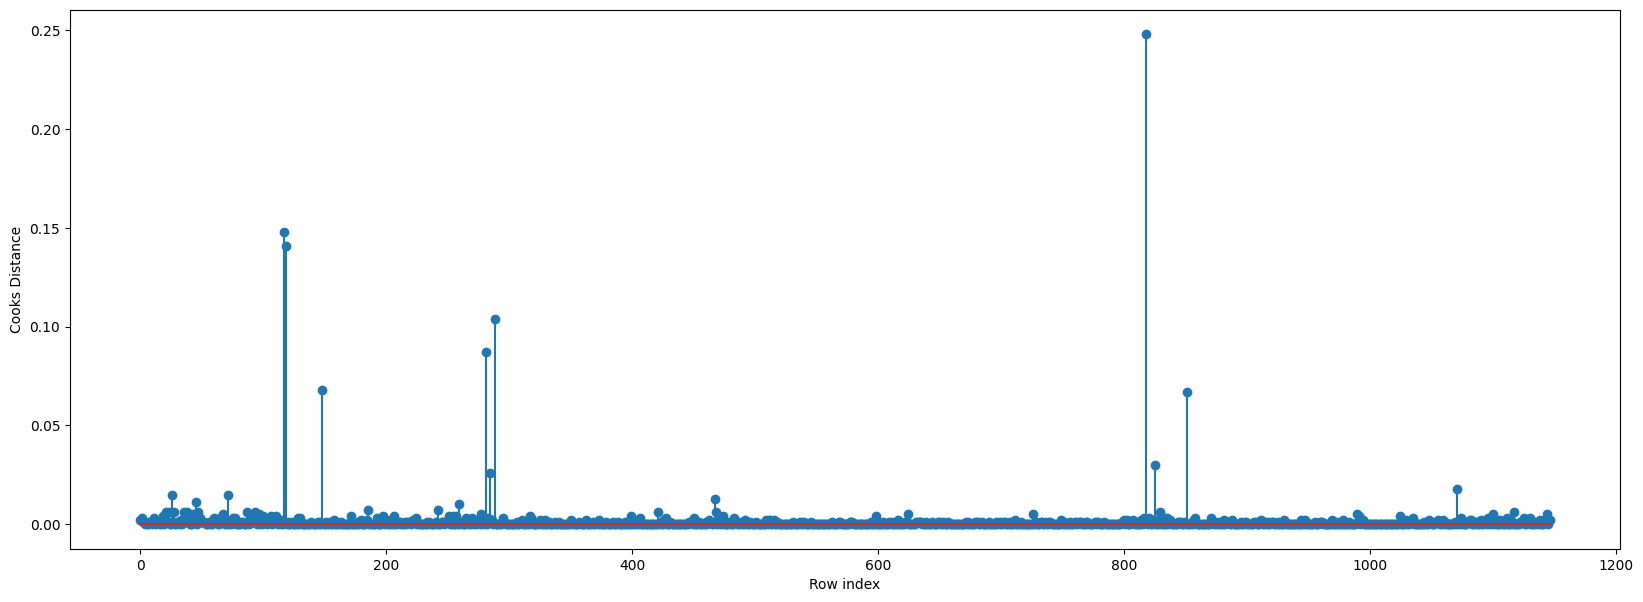

In [105]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df9)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show() 

In [106]:
k = df9.shape[1]
n = df9.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff 

0.026155187445510025

In [107]:
while np.max(c)>leverage_cutoff:
    ml_df9=smf.ols("price ~ age+km+hp+cc+doors+gears+qtax+wt" , data=df9).fit()
    (c, p )=ml_df9.get_influence().cooks_distance
    
    np.argmax(c) , np.max(c)
    df9=df9.drop(df9.index[[np.argmax(c)]],axis=0)
    df9=df9.reset_index()
    df9=df9.drop(["index"],axis=1)  

else:
    ml_df9=smf.ols("price ~ age+km+hp+cc+doors+gears+qtax+wt" , data=df9).fit()
    ml_df9.rsquared_adj
    print("Thus model accuracy is improved to",ml_df9.rsquared_adj)

Thus model accuracy is improved to 0.8875359170636583


In [108]:
ml_df9= smf.ols("price ~ age+km+hp+cc+doors+gears+qtax+wt" , data=df9).fit() 

print(ml_df9.rsquared, ml_df9.rsquared_adj)
print(ml_df9.pvalues)  

0.8882332143006418 0.8875359170636583
Intercept     1.317047e-28
age          1.565911e-238
km            1.064436e-31
hp            6.860978e-08
cc            1.914605e-06
doors         8.712225e-03
gears         1.317047e-28
qtax          1.348979e-04
wt            2.889997e-65
dtype: float64


In [109]:
ml_df9_pred_y =ml_df9.predict(df9)
ml_df9_rmse =np.sqrt(mean_squared_error(df9.price , ml_df9_pred_y)) 
ml_df9_rmse 

992.2713896131113

#### Model with some outliers and all features has R square adj value of 0.8875 

# 3) With All outliers

In [110]:
df1.corr().style.background_gradient(cmap='coolwarm') 

,price,age,km,hp,cc,doors,gears,qtax,wt
price,1.000000,-0.876059,-0.568724,0.313836,0.159904,0.182385,0.064171,0.211395,0.574483
age,-0.876059,1.000000,0.503851,-0.154800,-0.129482,-0.145941,-0.005799,-0.193144,-0.465226
km,-0.568724,0.503851,1.000000,-0.332623,0.305675,-0.034308,0.014772,0.283774,-0.022152
hp,0.313836,-0.154800,-0.332623,1.000000,0.049366,0.091444,0.209722,-0.302457,0.086464
cc,0.159904,-0.129482,0.305675,0.049366,1.000000,0.125329,0.041015,0.677757,0.650814
doors,0.182385,-0.145941,-0.034308,0.091444,0.125329,1.000000,-0.160060,0.107171,0.300827
gears,0.064171,-0.005799,0.014772,0.209722,0.041015,-0.160060,1.000000,-0.005094,0.021472
qtax,0.211395,-0.193144,0.283774,-0.302457,0.677757,0.107171,-0.005094,1.000000,0.622477
wt,0.574483,-0.465226,-0.022152,0.086464,0.650814,0.300827,0.021472,0.622477,1.000000


In [111]:
rsq_age = smf.ols('age~km+hp+cc+doors+gears+qtax+wt',data=df1).fit().rsquared  
vif_age = 1/(1-rsq_age) 

rsq_km = smf.ols('km~age+hp+cc+doors+gears+qtax+wt',data=df1).fit().rsquared  
vif_km = 1/(1-rsq_km) 

rsq_hp = smf.ols("hp~age+km+cc+doors+gears+qtax+wt",data=df1).fit().rsquared  
vif_hp = 1/(1-rsq_hp)

rsq_cc = smf.ols('cc~age+km+hp+doors+gears+qtax+wt',data=df1).fit().rsquared  
vif_cc = 1/(1-rsq_cc) 

rsq_doors = smf.ols('doors~age+km+hp+cc+gears+qtax+wt',data=df1).fit().rsquared  
vif_doors = 1/(1-rsq_doors)

rsq_gears = smf.ols('gears~age+km+hp+cc+doors+qtax+wt',data=df1).fit().rsquared  
vif_gears = 1/(1-rsq_cc)

rsq_qtax = smf.ols('qtax~age+km+hp+cc+doors+gears++wt',data=df1).fit().rsquared  
vif_qtax = 1/(1-rsq_qtax)

rsq_wt = smf.ols('wt~age+km+hp+cc+doors+gears+qtax',data=df1).fit().rsquared  
vif_wt = 1/(1-rsq_wt)


# Storing vif values in a data frame
df_vif = {'Variables':['age','km','hp','cc','doors','gears','qtax','wt'],'VIF':[vif_age, vif_km, vif_hp,vif_cc, vif_doors, vif_gears, vif_qtax, vif_wt]}
Vif_frame = pd.DataFrame(df_vif)  
Vif_frame

,Variables,VIF
0,age,1.878917
1,km,1.908320
2,hp,1.584414
3,cc,2.748130
4,doors,1.162567
5,gears,2.748130
6,qtax,2.842987
7,wt,2.833743


All VIF values are less than 5, which is good thing. 

# 3.1) Model with all features

In [112]:
ml_df1= smf.ols("price ~ age+km+hp+cc+doors+gears+qtax+wt" , data=df1).fit()  #ALL

print(ml_df1.rsquared, ml_df1.rsquared_adj)
print(ml_df1.pvalues)

#doors p value is greater than 5% , hence in next model we will remove door 

0.8681163912634055 0.8673759920564632
Intercept     8.123945e-06
age          2.336818e-292
km            1.868674e-41
hp            5.123463e-39
cc            7.178158e-16
doors         4.993149e-01
gears         6.341805e-03
qtax          4.846286e-10
wt            4.509449e-65
dtype: float64


In [113]:
ml_df1_pred_y =ml_df1.predict(df1)
ml_df1_rmse =np.sqrt(mean_squared_error(df1.price , ml_df1_pred_y)) 
ml_df1_rmse 

1308.1597166877107

# 3.2) Model with No door

In [114]:
ml_df1= smf.ols("price ~ age+km+hp+cc+gears+qtax+wt" , data=df1).fit()  #No doors since p value > 5% 

print(ml_df1.rsquared, ml_df1.rsquared_adj)
print(ml_df1.pvalues) 

0.8680741306155818 0.8674265281711983
Intercept     7.305266e-06
age          1.642532e-292
km            9.456256e-42
hp            5.225313e-39
cc            8.842665e-16
gears         3.563425e-03
qtax          4.127478e-10
wt            4.058567e-68
dtype: float64


In [115]:
influence_points=ml_df1.get_influence()
c,p_value= influence_points.cooks_distance 

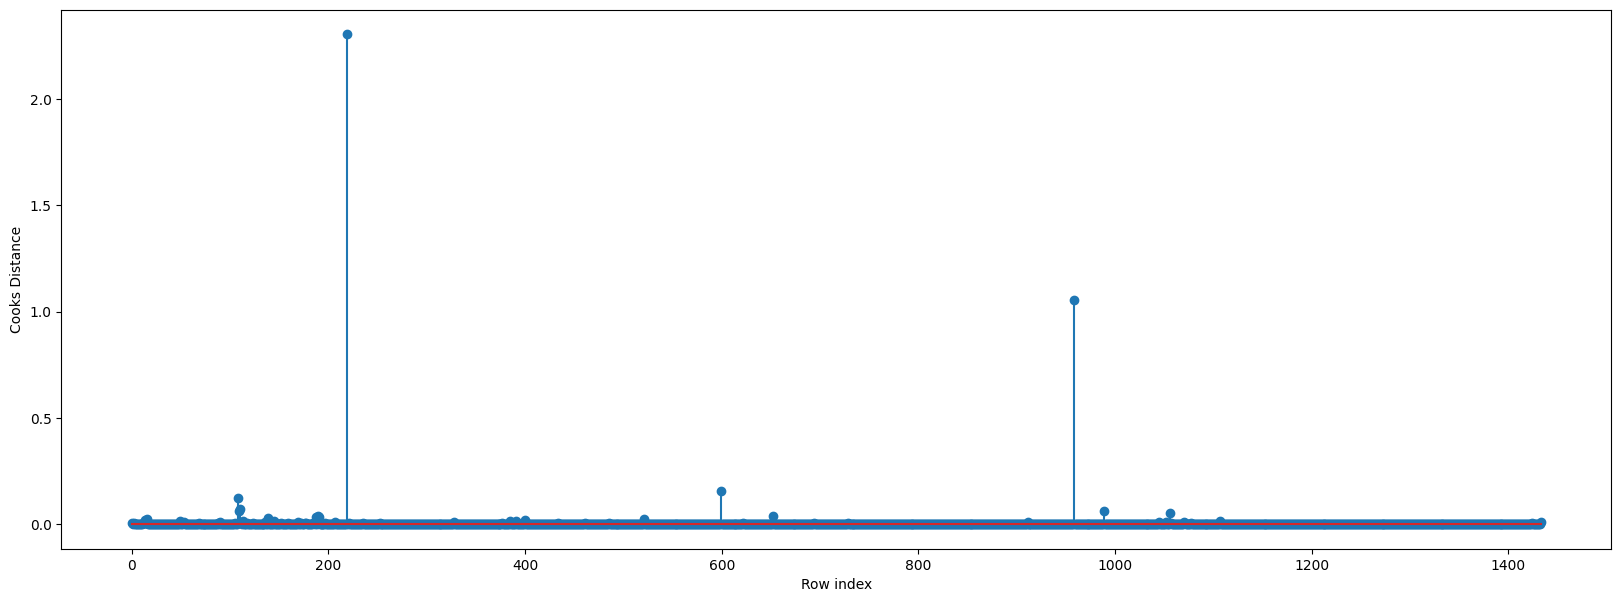

In [116]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [117]:
k = df1.shape[1]
n = df1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.02092050209205021

In code below, df1 will get modified while removing influence points, so lets create a copy of df1 for future purpose.

In [118]:
df11 = df1.copy()

In [119]:
df111 = df1.copy() 

In [120]:
df1_x = df1.copy()

In [121]:
while np.max(c)>leverage_cutoff:
    ml_df1=smf.ols("price ~ age+km+hp+cc+gears+qtax+wt" , data=df1).fit()
    (c, p )=ml_df1.get_influence().cooks_distance
    
    np.argmax(c) , np.max(c)
    df1=df1.drop(df1.index[[np.argmax(c)]],axis=0)
    df1=df1.reset_index()
    df1=df1.drop(["index"],axis=1)  

else:
    ml_df1=smf.ols("price ~ age+km+hp+cc+gears+qtax+wt" , data=df1).fit()
    ml_df1.rsquared_adj
    print("Thus model accuracy is improved to",ml_df1.rsquared_adj) 

Thus model accuracy is improved to 0.8872919947853615


In [122]:
ml_df1= smf.ols("price ~ age+km+hp+cc+gears+qtax+wt" , data=df1).fit() 

print(ml_df1.rsquared, ml_df1.rsquared_adj)
print(ml_df1.pvalues)

#now, p value of Qtax is > 5% , hence in next model we will remove both doors and qtax

0.8878515380736611 0.8872919947853615
Intercept     2.048603e-21
age          1.018735e-294
km            1.688007e-49
hp            9.043109e-18
cc            3.950462e-22
gears         2.209584e-03
qtax          6.750805e-01
wt            4.137711e-99
dtype: float64


In [123]:
ml_df1_pred_y =ml_df1.predict(df1)
ml_df1_rmse =np.sqrt(mean_squared_error(df1.price , ml_df1_pred_y)) 
ml_df1_rmse 

1131.2666922060814

### Model with all outliers and without doors has accuracy of 0.8872

# 3.3) Model with NO door and Qtax

Use df11 which is copy of df1 before modification.  

In [124]:
ml_df11= smf.ols("price ~ age+km+hp+cc+gears+wt" , data=df11).fit()  # no door no qtax

print(ml_df11.rsquared, ml_df11.rsquared_adj)
print(ml_df11.pvalues)

0.8644100612459049 0.8638399563877938
Intercept     6.957186e-11
age          9.936009e-294
km            4.665918e-38
hp            1.712285e-30
cc            6.563931e-09
gears         9.766431e-04
wt            1.600607e-89
dtype: float64


In [125]:
influence_points=ml_df11.get_influence()
c,p_value= influence_points.cooks_distance

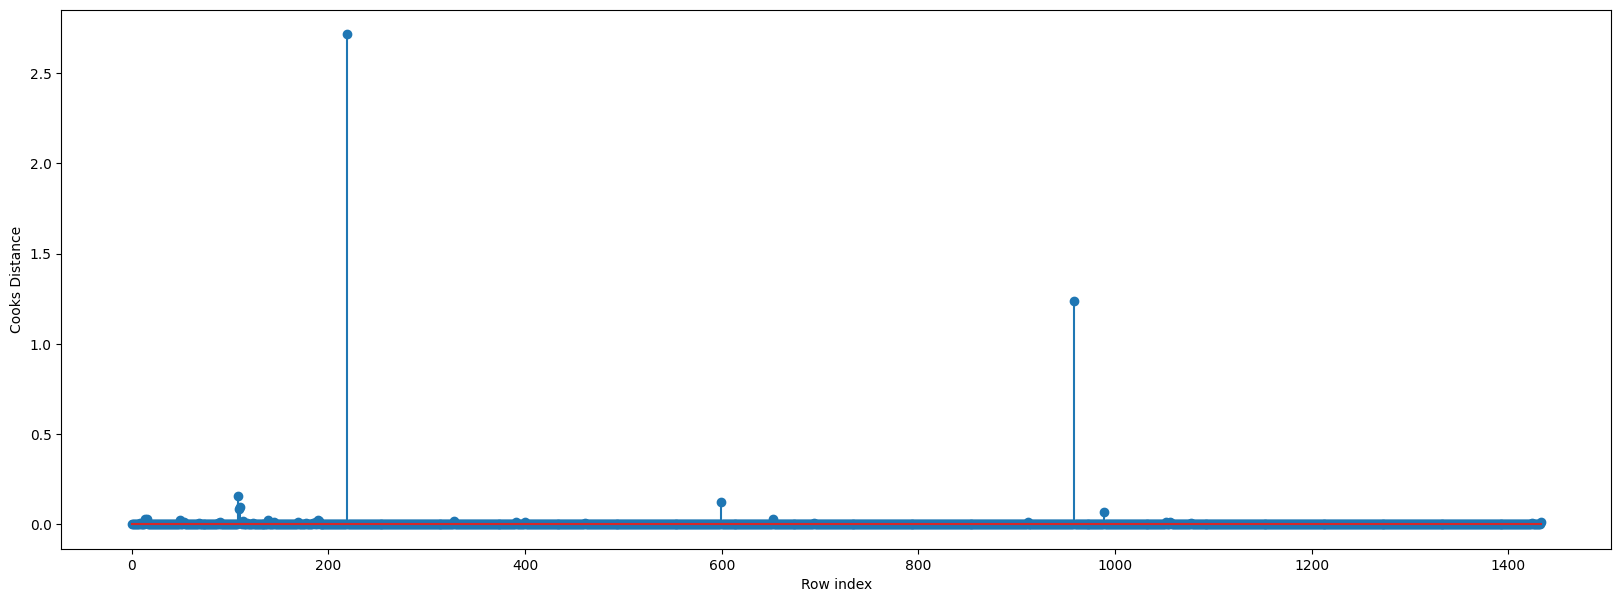

In [126]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df11)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [127]:
k = df11.shape[1]
n = df11.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.02092050209205021

In [128]:
while np.max(c)>leverage_cutoff:
    ml_df11=smf.ols("price ~ age+km+hp+cc+gears+wt" , data=df11).fit()
    (c, p )=ml_df11.get_influence().cooks_distance
    
    np.argmax(c) , np.max(c)
    df11=df11.drop(df11.index[[np.argmax(c)]],axis=0)
    df11=df11.reset_index()
    df11=df11.drop(["index"],axis=1)  

else:
    ml_df11=smf.ols("price ~ age+km+hp+cc+gears+wt" , data=df11).fit()
    ml_df11.rsquared_adj
    print("Thus model accuracy is improved to",ml_df11.rsquared_adj)

Thus model accuracy is improved to 0.8828097293499161


In [129]:
ml_df11= smf.ols("price ~ age+km+hp+cc+gears+wt" , data=df11).fit() 

print(ml_df11.rsquared, ml_df11.rsquared_adj)
print(ml_df11.pvalues)

#all p values are less than 0.05

0.8833070006539475 0.8828097293499161
Intercept     8.712157e-23
age          9.666345e-286
km            7.744207e-50
hp            1.825526e-23
cc            1.380241e-25
gears         1.962945e-02
wt           3.006885e-111
dtype: float64


In [130]:
ml_df11_pred_y =ml_df11.predict(df11)
ml_df11_rmse =np.sqrt(mean_squared_error(df11.price , ml_df11_pred_y)) 
ml_df11_rmse 

1150.47550797232

### Model with no door and qtax has R square adj value of 0.8828 

# 3.4) Model with No gears, Qtax, Doors 

use df111 which is copy of df1  

In [131]:
ml_df111= smf.ols("price ~ age+km+hp+cc+wt" , data=df111).fit() 
#No gears due to least correlation
#NO qtax due to high colinearity
#No door due to high p value

print(ml_df111.rsquared, ml_df111.rsquared_adj)
print(ml_df111.pvalues) 

0.8633727855273325 0.8628943989220361
Intercept     5.543233e-09
age          3.900646e-293
km            1.170177e-36
hp            1.724854e-35
cc            7.082160e-09
wt            7.046912e-89
dtype: float64


In [132]:
influence_points=ml_df111.get_influence()
c,p_value= influence_points.cooks_distance

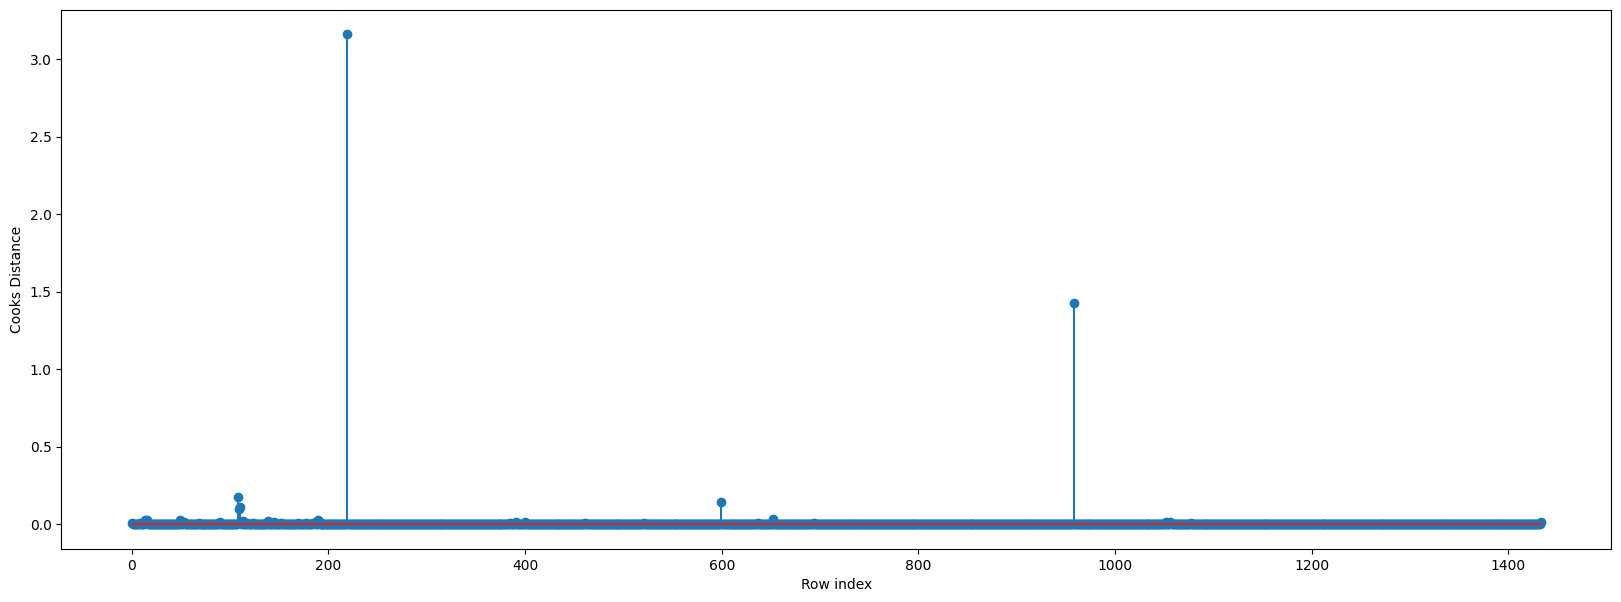

In [133]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df111)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [134]:
k = df111.shape[1]
n = df111.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.02092050209205021

In [135]:
while np.max(c)>leverage_cutoff:
    ml_df111=smf.ols("price ~ age+km+hp+cc+wt" , data=df111).fit()
    (c, p )=ml_df111.get_influence().cooks_distance
    
    np.argmax(c) , np.max(c)
    df111=df111.drop(df111.index[[np.argmax(c)]],axis=0)
    df111=df111.reset_index()
    df111=df111.drop(["index"],axis=1)  

else:
    ml_df111=smf.ols("price ~ age+km+hp+cc+wt" , data=df111).fit()
    ml_df111.rsquared_adj
    print("Thus model accuracy is improved to",ml_df111.rsquared_adj) 

Thus model accuracy is improved to 0.8816195640564652


In [136]:
ml_df111= smf.ols("price ~ age+km+hp+cc+wt" , data=df111).fit() 

print(ml_df111.rsquared, ml_df111.rsquared_adj)
print(ml_df111.pvalues)

#all p values are less than 0.05

0.8820387582347355 0.8816195640564652
Intercept     1.293140e-22
age          1.691690e-288
km            1.984854e-50
hp            5.276094e-22
cc            4.822362e-24
wt           1.966819e-107
dtype: float64


In [137]:
ml_df111_pred_y =ml_df111.predict(df111)
ml_df111_rmse =np.sqrt(mean_squared_error(df111.price , ml_df111_pred_y)) 
ml_df111_rmse 

1147.922790650105

### Model with all outliers and without Qtax and gears, doors has accuracy of 0.8816

## Log Transformation 

In [138]:
df_log = pd.DataFrame()

df_log['age'] = np.log(df1_x.age)
df_log['price'] = np.log(df1_x.price)
df_log['hp'] = np.log(df1_x.hp) 
df_log['wt'] = np.log(df1_x.wt)
df_log['qtax'] = np.log(df1_x.qtax)
df_log['cc'] = np.log(df1_x.cc)
df_log['km'] = df1_x.km
df_log['gears'] = df1_x.gears
df_log['doors'] = df1_x.doors  

In [139]:
model_log= smf.ols("price ~ age+km+hp+cc+gears+qtax+wt", data = df_log).fit() #No door

print(model_log.rsquared, model_log.rsquared_adj)
print(model_log.pvalues)  

# p value of doors > 5% hence removed

0.8024050308556359 0.8014350695765261
Intercept     9.254676e-02
age          7.257331e-191
km            9.320408e-66
hp            4.257843e-21
cc            2.303066e-02
gears         2.929770e-05
qtax          1.109608e-14
wt            1.038924e-20
dtype: float64


In [140]:
model_log_pred_y =np.exp(model_log.predict(df_log))
model_log_rmse =np.sqrt(mean_squared_error(df1_x.price , model_log_pred_y)) 
model_log_rmse 

1840.2206609964667

# Square root transformation  

In [141]:
df_sqrt = pd.DataFrame()

df_sqrt['age'] = np.sqrt(df1_x.age)
df_sqrt['price'] = np.sqrt(df1_x.price)
df_sqrt['km'] = np.sqrt(df1_x.km)
df_sqrt['wt'] = np.sqrt(df1_x.wt)
df_sqrt['cc'] = np.sqrt(df1_x.cc)
df_sqrt['qtax'] = np.sqrt(df1_x.qtax)
df_sqrt['gears'] = np.sqrt(df1_x.gears)
df_sqrt['doors'] = np.sqrt(df1_x.doors)
df_sqrt['hp'] = np.sqrt(df1_x.hp) 

In [142]:
model_sqrt= smf.ols("price ~ age+km+hp+cc+qtax+gears+wt", data = df_sqrt).fit() #no door

print(model_sqrt.rsquared, model_sqrt.rsquared_adj)
print(model_sqrt.pvalues) 

# p value of doors > 5% hence removed 

0.86686355750856 0.8662100125594436
Intercept     2.243217e-01
age          1.133114e-276
km            4.389333e-36
hp            1.918593e-45
cc            5.151457e-10
qtax          1.387267e-13
gears         1.260623e-04
wt            1.013841e-31
dtype: float64


In [143]:
model_sqrt_pred_y =np.square(model_sqrt.predict(df_sqrt))
model_sqrt_rmse =np.sqrt(mean_squared_error(df1_x.price , model_sqrt_pred_y)) 
model_sqrt_rmse 

1235.8517766945317

# Cube root transformation 

In [144]:
df_cbrt = pd.DataFrame()

df_cbrt['age'] = np.cbrt(df1_x.age)
df_cbrt['price'] = np.cbrt(df1_x.price)
df_cbrt['km'] = np.cbrt(df1_x.km)
df_cbrt['wt'] = np.cbrt(df1_x.wt)
df_cbrt['cc'] = np.cbrt(df1_x.cc)
df_cbrt['qtax'] = np.cbrt(df1_x.qtax)
df_cbrt['gears'] = np.cbrt(df1_x.gears)
df_cbrt['doors'] = np.cbrt(df1_x.doors)
df_cbrt['hp'] = np.cbrt(df1_x.hp) 

In [145]:
model_cbrt= smf.ols("price ~ age+km+hp+cc+qtax+gears+wt", data = df_cbrt).fit() #no door

print(model_cbrt.rsquared, model_cbrt.rsquared_adj)
print(model_cbrt.pvalues) 

# p value of doors > 5% hence removed 

0.8443743264578234 0.8436103855638576
Intercept     5.113183e-01
age          6.922167e-243
km            2.275212e-22
hp            1.763734e-47
cc            9.051043e-10
qtax          5.741760e-14
gears         3.065779e-04
wt            1.142382e-22
dtype: float64


In [146]:
model_cbrt_pred_y =pow((model_cbrt.predict(df_cbrt)),3) 
model_cbrt_rmse =np.sqrt(mean_squared_error(df1_x.price , model_cbrt_pred_y)) 
model_cbrt_rmse 

1369.8782506966438

# StandardScaler 

In [147]:
from sklearn.preprocessing import StandardScaler

columns = df1_x.columns
features = df1_x[columns]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df_std = pd.DataFrame(features, columns = columns)  

In [148]:
df_std1 = df_std.copy() # for future use

In [149]:
model_std= smf.ols("price ~ age+km+hp+cc+gears+qtax+wt", data = df_std).fit()

print(model_std.rsquared, model_std.rsquared_adj)
print(model_std.pvalues) 

#doors p value > 5%, so we remove it

0.8680741306155819 0.8674265281711984
Intercept     1.000000e+00
age          1.642532e-292
km            9.456256e-42
hp            5.225313e-39
cc            8.842665e-16
gears         3.563425e-03
qtax          4.127478e-10
wt            4.058567e-68
dtype: float64


In [150]:
model_std_pred_y =model_std.predict(df_std)
model_std_rmse =np.sqrt(mean_squared_error(df_std.price , model_std_pred_y)) 
model_std_rmse 

#Here, RMSE value is standard scaler transformed. 

0.363216009262282

R square adj value of 0.8674 is best among all the 4 transformations. so lets further work on std scaler model to remove influence points.

In [151]:
influence_points=model_std.get_influence()
c,p_value= influence_points.cooks_distance

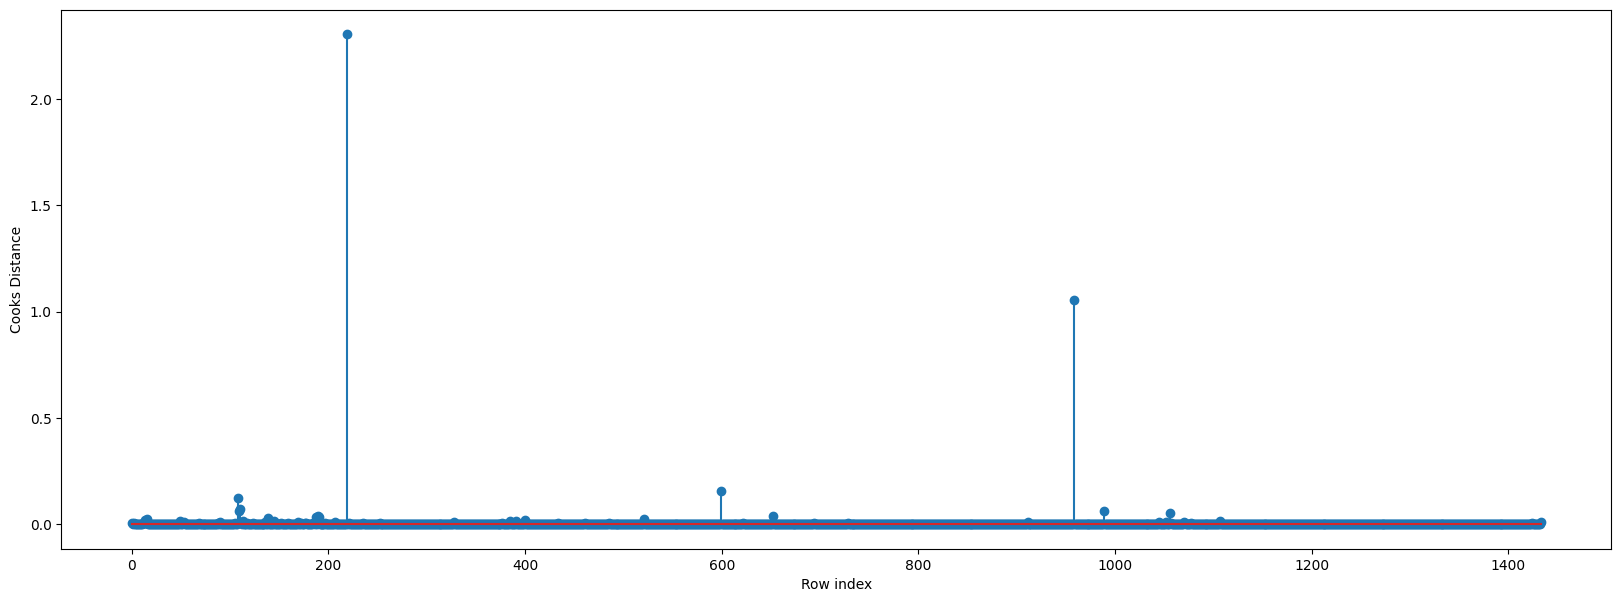

In [152]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df_std)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [153]:
k = df_std.shape[1]
n = df_std.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.02092050209205021

In [154]:
while np.max(c)>leverage_cutoff:
    model_std=smf.ols("price ~ age+km+hp+cc+gears+qtax+wt" , data=df_std).fit()
    (c, p )=model_std.get_influence().cooks_distance
    
    np.argmax(c) , np.max(c)
    df_std=df_std.drop(df_std.index[[np.argmax(c)]],axis=0)
    df_std=df_std.reset_index()
    df_std=df_std.drop(["index"],axis=1)  

else:
    model_std=smf.ols("price ~ age+km+hp+cc+gears+qtax+wt" , data=df_std).fit()
    model_std.rsquared_adj
    print("Thus model accuracy is improved to",model_std.rsquared_adj) 

Thus model accuracy is improved to 0.8872919947853614


In [155]:
model_std= smf.ols("price ~ age+km+hp+cc+gears+qtax+wt", data = df_std).fit()

print(model_std.rsquared, model_std.rsquared_adj)
print(model_std.pvalues) 

#now qtax p value > 5%

0.887851538073661 0.8872919947853614
Intercept     3.294029e-01
age          1.018735e-294
km            1.688007e-49
hp            9.043109e-18
cc            3.950462e-22
gears         2.209584e-03
qtax          6.750805e-01
wt            4.137711e-99
dtype: float64


Standard scaler transformation model with no door and qtax

In [156]:
model_std= smf.ols("price ~ age+km+hp+cc+gears+wt", data = df_std1).fit() #no door n qtax

print(model_std.rsquared, model_std.rsquared_adj)
print(model_std.pvalues) 

0.8644100612459047 0.8638399563877935
Intercept     1.000000e+00
age          9.936009e-294
km            4.665918e-38
hp            1.712285e-30
cc            6.563931e-09
gears         9.766431e-04
wt            1.600607e-89
dtype: float64


In [157]:
influence_points=model_std.get_influence()
c,p_value= influence_points.cooks_distance

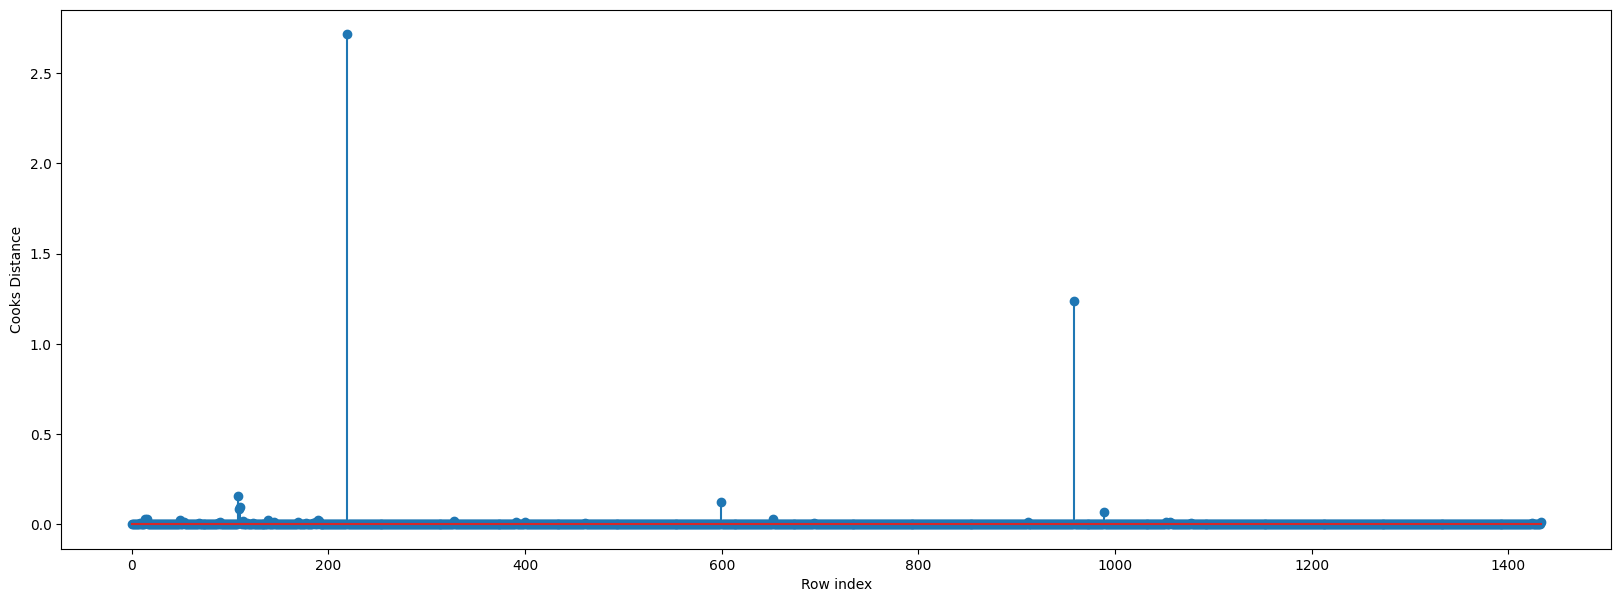

In [158]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df_std1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [159]:
k = df_std1.shape[1]
n = df_std1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.02092050209205021

In [160]:
while np.max(c)>leverage_cutoff:
    model_std=smf.ols("price ~ age+km+hp+cc+gears+wt" , data=df_std1).fit()
    (c, p )=model_std.get_influence().cooks_distance
    
    np.argmax(c) , np.max(c)
    df_std1=df_std1.drop(df_std1.index[[np.argmax(c)]],axis=0)
    df_std1=df_std1.reset_index()
    df_std1=df_std1.drop(["index"],axis=1)  

else:
    model_std=smf.ols("price ~ age+km+hp+cc+gears+wt" , data=df_std1).fit()
    model_std.rsquared_adj
    print("Thus model accuracy is improved to",model_std.rsquared_adj) 

Thus model accuracy is improved to 0.8828097293499161


In [161]:
model_std= smf.ols("price ~ age+km+hp+cc+gears+wt", data = df_std1).fit() #no door n qtax

print(model_std.rsquared, model_std.rsquared_adj)
print(model_std.pvalues) 

0.8833070006539475 0.8828097293499161
Intercept     5.140010e-01
age          9.666345e-286
km            7.744207e-50
hp            1.825526e-23
cc            1.380241e-25
gears         1.962945e-02
wt           3.006885e-111
dtype: float64


In [162]:
model_std_pred_y =model_std.predict(df_std1)
model_std_rmse =np.sqrt(mean_squared_error(df_std1.price , model_std_pred_y)) 
model_std_rmse 

#Here, RMSE value is standard scaler transformed. 

0.319383162789472

In [163]:
performance=pd.DataFrame() 

In [164]:
performance=pd.DataFrame() 

performance['Outliers'] = ['Model without outliers','Model without outliers', 'Model without outliers', 
                           'Model with some outliers', 'Model with All outliers', 'Model with All outliers',
                           'Model with All outliers', 'Model with All outliers','Model with All outliers',
                           'Model with All outliers','Model with All outliers','Model with All outliers', 'Model with All outliers']

performance['Features'] = ['All' , 'No Qtax', 'No Qtax & gear', 'All', 'All', 'No Door', 'No Door & qtax', 
                           'No gear, qtax & doors','No door','No door','No door','No door', 'No door n qtax']

performance['Transformation'] = ['','','','','','','','','Log', 'Square root', 'Cube root', 'Standard scaler', 'Standard scaler']

performance['R square adj'] = [0.8212, 0.8298, 0.8317, 0.8875, 0.8673, 0.8872, 0.8828, 0.8816, 0.8014, 0.8662, 0.8436, 0.8872, 0.8828 ] 


performance['RMSE'] = [963.68, 936.49, 930.26, 992.27,1308.15, 1131.26,1150.47, 1147.92, 1840.22,1235.85, 1369.87, 0.3632, 0.3193] 

In [165]:
performance 

,Outliers,Features,Transformation,R square adj,RMSE
0,Model without outliers,All,,0.8212,963.6800
1,Model without outliers,No Qtax,,0.8298,936.4900
2,Model without outliers,No Qtax & gear,,0.8317,930.2600
3,Model with some outliers,All,,0.8875,992.2700
4,Model with All outliers,All,,0.8673,1308.1500
5,Model with All outliers,No Door,,0.8872,1131.2600
6,Model with All outliers,No Door & qtax,,0.8828,1150.4700
7,Model with All outliers,"No gear, qtax & doors",,0.8816,1147.9200
8,Model with All outliers,No door,Log,0.8014,1840.2200
9,Model with All outliers,No door,Square root,0.8662,1235.8500


Model with some outliers	All		R square adj = 0.8875	RMSE = 992.2700

## Final Model (Model with some outliers and All features)

df9 has been modified while removing influencer points, so use df9_og which is copy of original df9 

Assupmtion for multi linear Regression are as follows:  

### 1)Feature should be independent of each other

In [166]:
model_final= smf.ols("price ~ age+km+hp+cc+doors+gears+qtax+wt" , data=df9_og).fit() #ALL

print(model_final.rsquared, model_final.rsquared_adj)
print(model_final.pvalues) 

# All p values lower than 5%

0.8731940876372072 0.8724147712311145
Intercept     3.237407e-23
age          4.137962e-223
km            4.898041e-32
hp            3.752565e-21
cc            5.090910e-30
doors         3.719093e-03
gears         3.237407e-23
qtax          3.057981e-04
wt            2.524749e-62
dtype: float64


P value of all input variables are less than 0.05, which indicates contribution of all input variables in predicting output is of statistical importance and not a matter of chance.

## Residual Analysis

### 2)Residues i.e. errors (xi-xi^) should be independently and normally distributed

### Test for Normality of Residuals (Q-Q Plot)

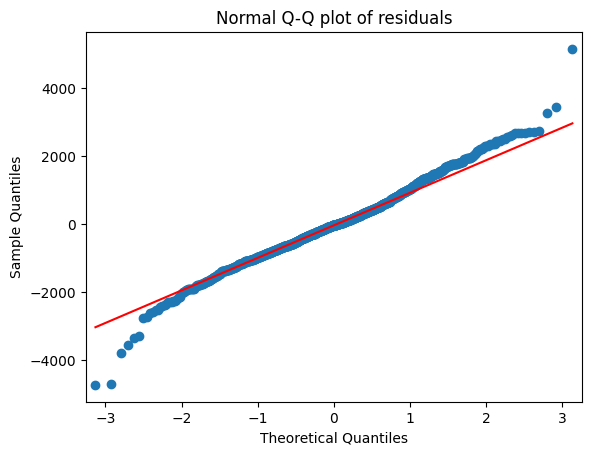

In [167]:
sm.qqplot(model_final.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()  

Normality of the residuals is an assumption of running a linear model. So, if your residuals are normal, it means that your assumption is valid and model inference should also be valid.

### 3)Constant Variance (Homoscedasticity)

In [168]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std() 

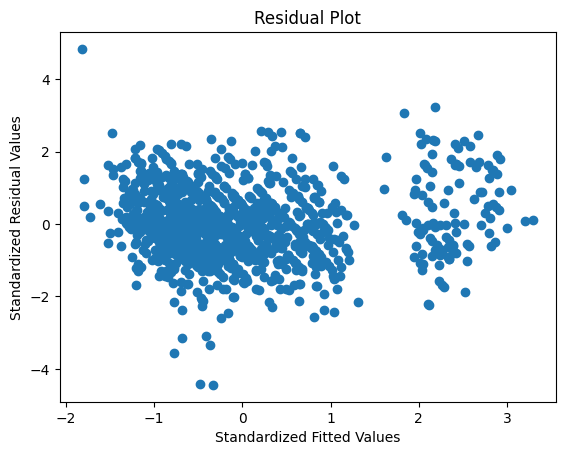

In [169]:
plt.scatter(get_standardized_values(model_final.fittedvalues), get_standardized_values(model_final.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show() 

The assumption of linear regression is esiduals are homoscedastic. Homoscedasticity means that they are roughly the same throughout, which means your residuals do not suddenly get larger. 

###  4)Some errors are positive, some are negative. Hence mean of errors should be zero 

In [170]:
errors=model_final.resid 
errors.mean()  

5.287388284831148e-09

# Residual VS Regressors 

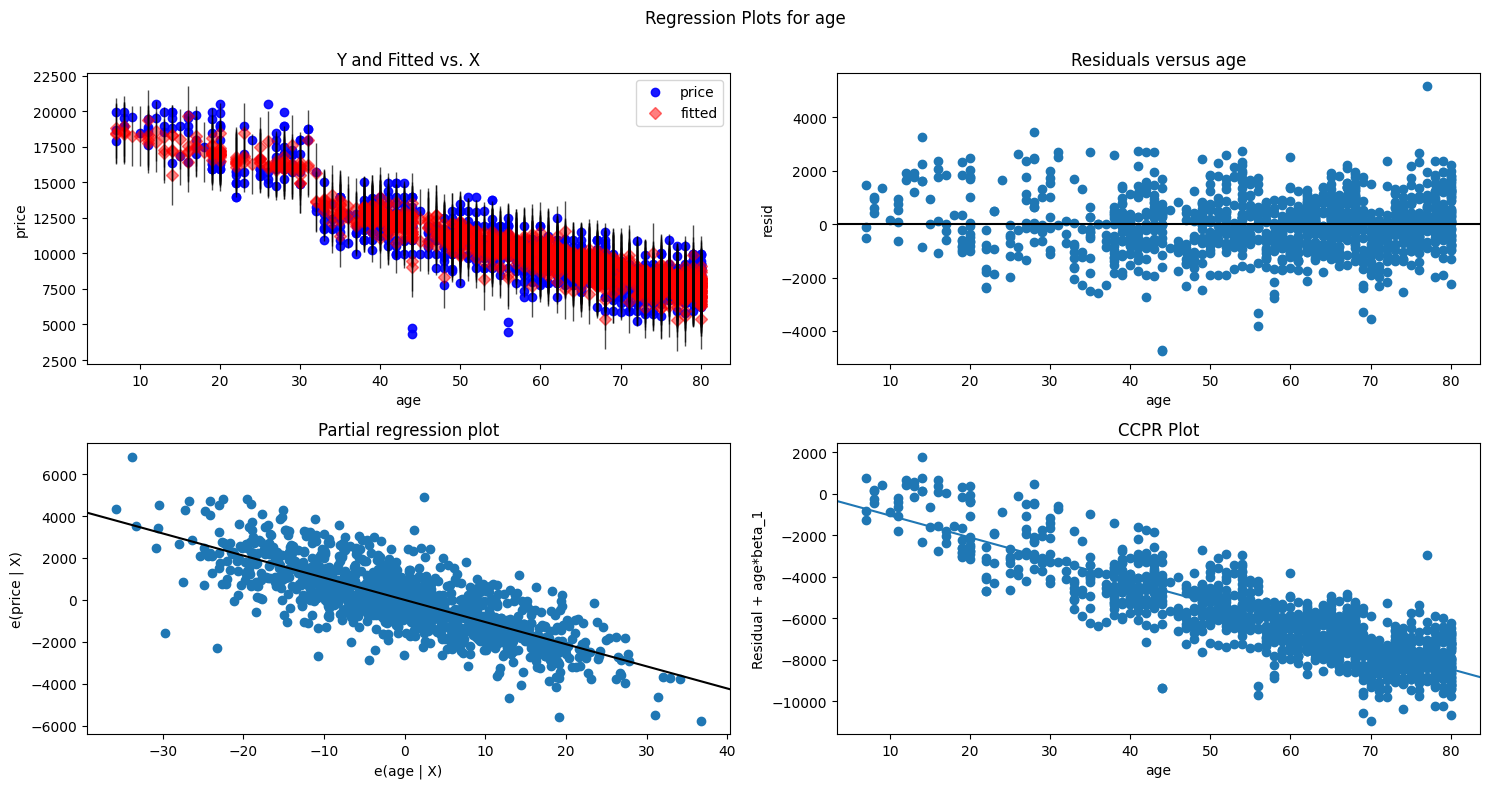

In [171]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_final, "age", fig=fig)
plt.show() 

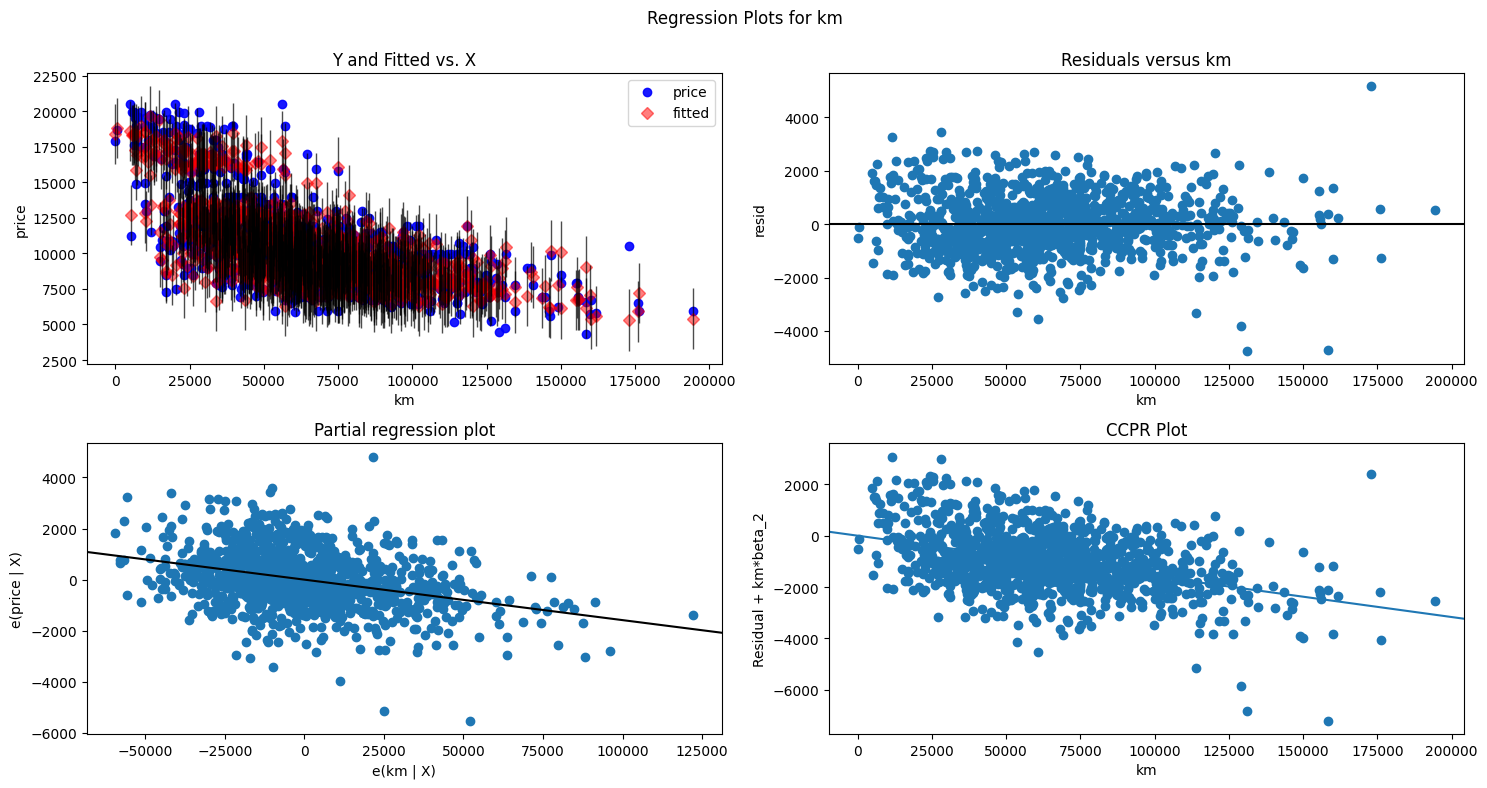

In [172]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_final, "km", fig=fig)
plt.show() 

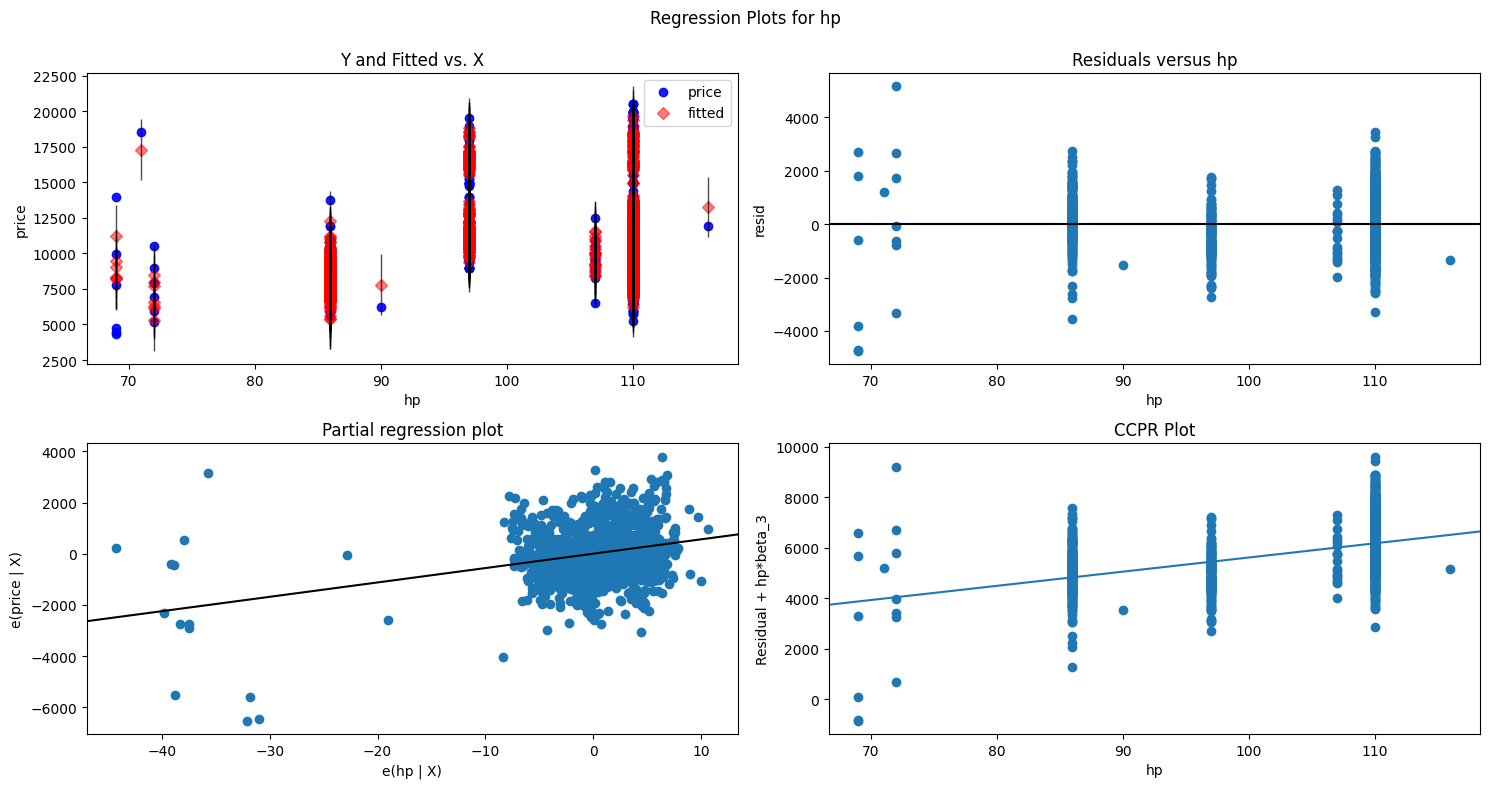

In [173]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_final, "hp", fig=fig)
plt.show()  

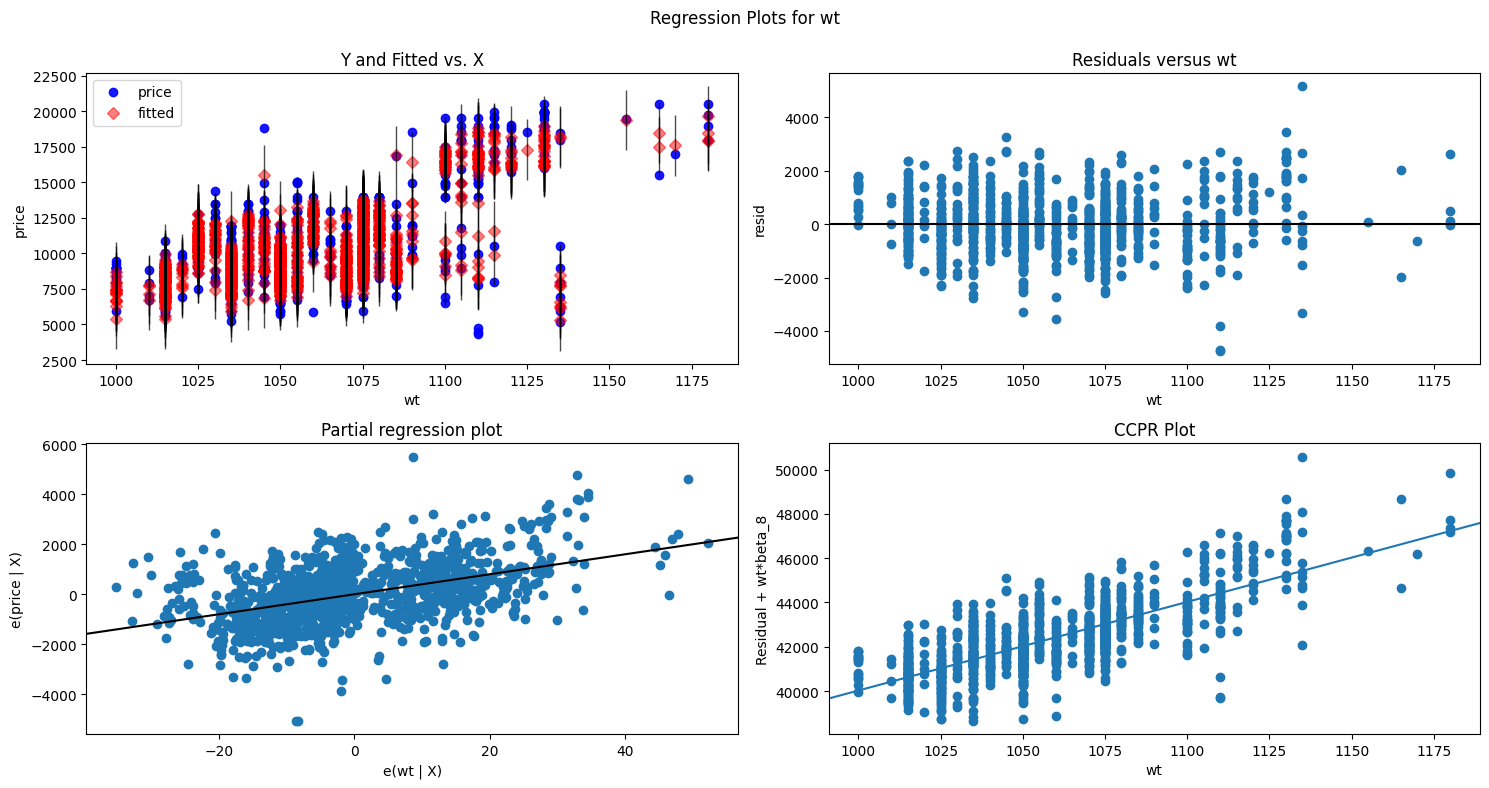

In [174]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_final, "wt", fig=fig)
plt.show()  

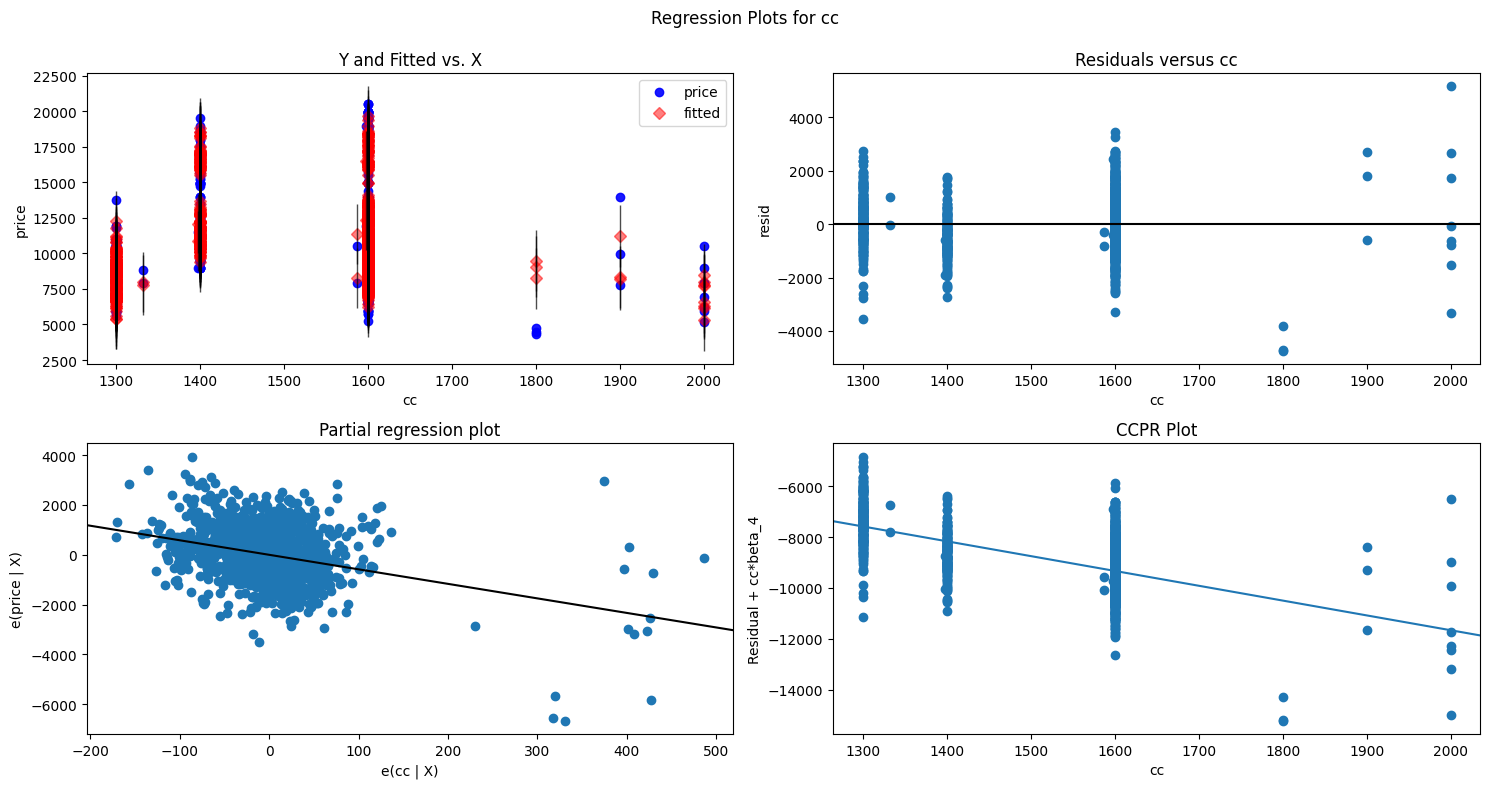

In [175]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_final, "cc", fig=fig)
plt.show() 

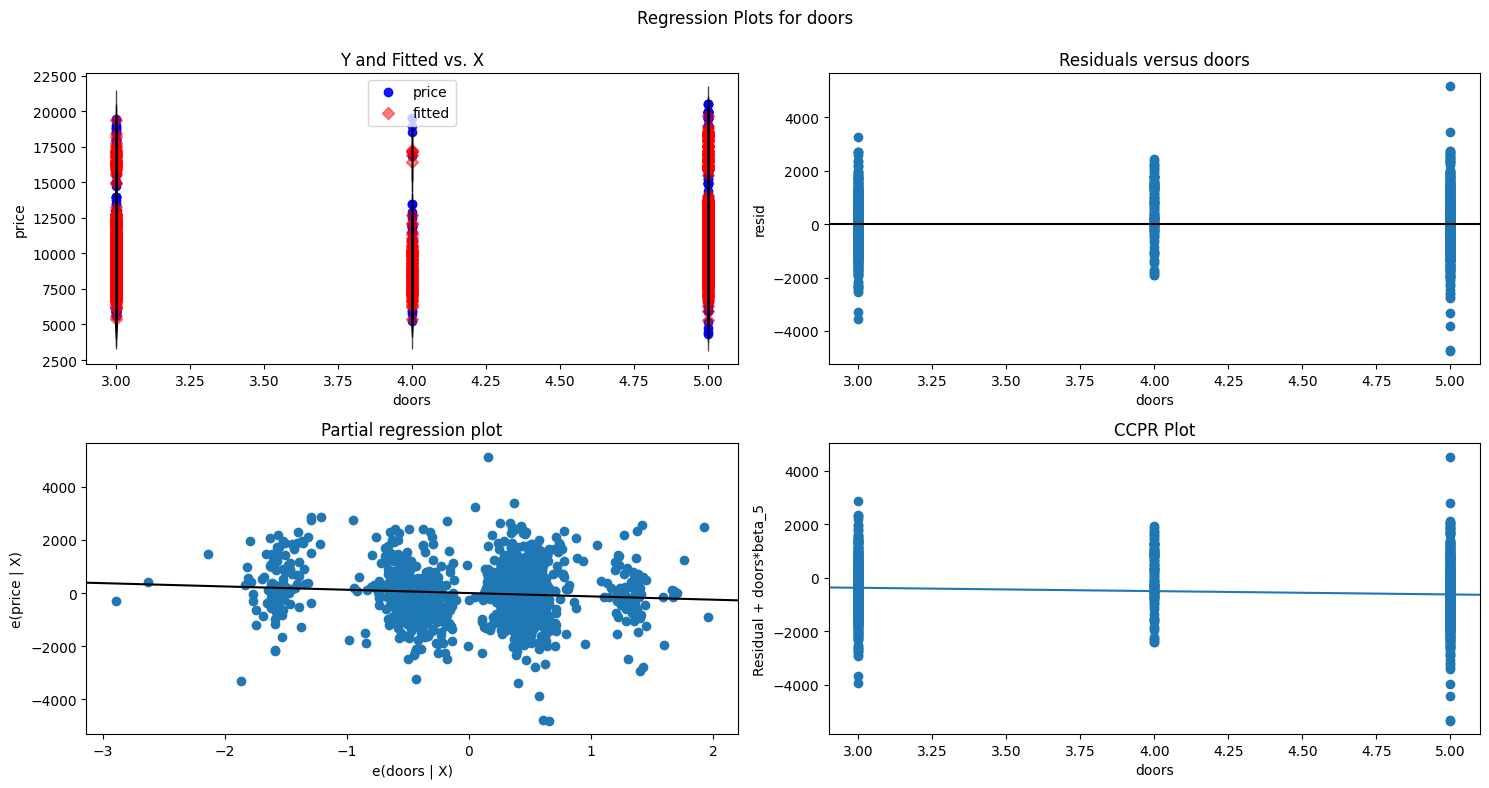

In [176]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_final, "doors", fig=fig)
plt.show() 

# Model Deletion Diagnostics

## Detecting Influencers/Outliers 

### Cook’s Distance 

In [177]:
influence_points=model_final.get_influence()
c,p_value= influence_points.cooks_distance 

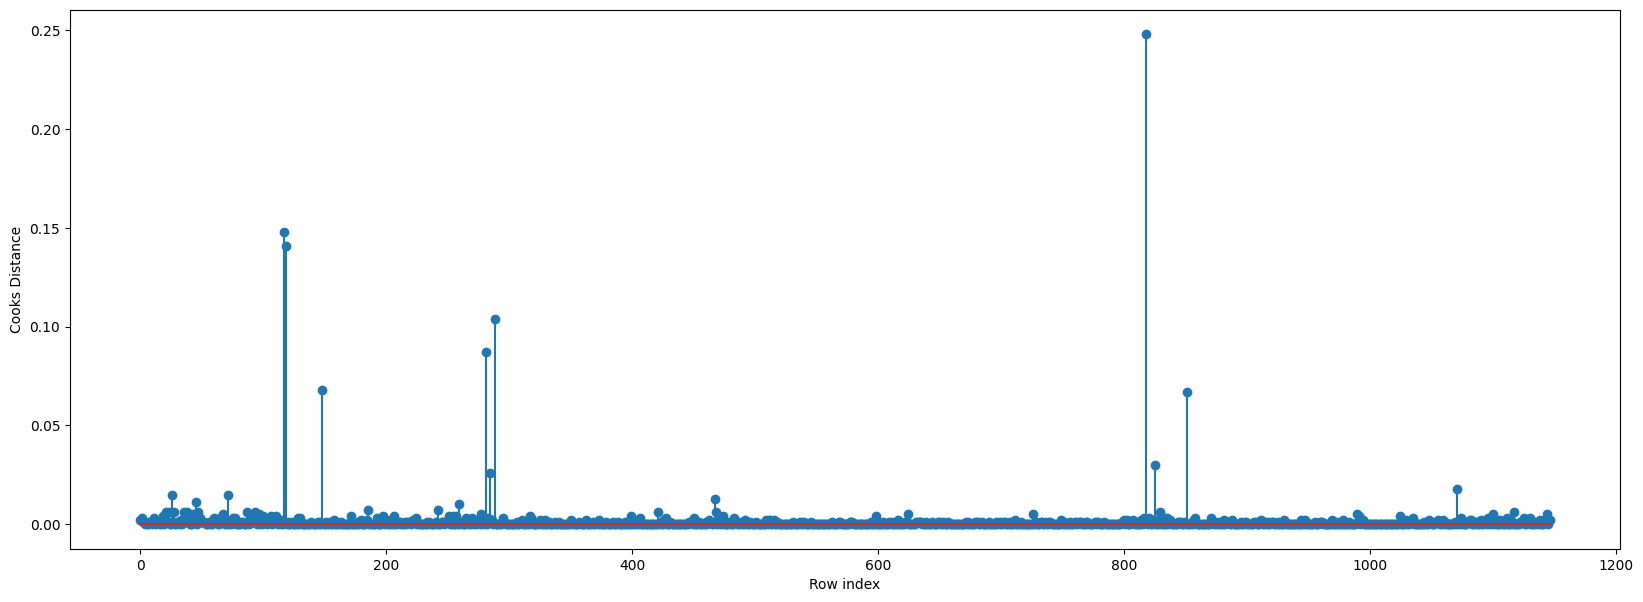

In [178]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df9_og)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show() 

In [179]:
k = df9_og.shape[1]
n = df9_og.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.026155187445510025

In [180]:
while np.max(c)>leverage_cutoff:
    model_final=smf.ols("price ~ age+km+hp+cc+doors+gears+qtax+wt" , data=df9_og ).fit()
    (c, p )=model_final.get_influence().cooks_distance
    
    np.argmax(c) , np.max(c)
    df9_og =df9_og.drop(df9_og .index[[np.argmax(c)]],axis=0)
    df9_og =df9_og.reset_index()
    df9_og =df9_og.drop(["index"],axis=1)  

else:
    model_final=smf.ols("price ~ age+km+hp+cc+doors+gears+qtax+wt" , data=df9_og ).fit()
    model_final.rsquared_adj
    print("Thus model accuracy is improved to",model_final.rsquared_adj)  

Thus model accuracy is improved to 0.8875359170636583


In [181]:
model_final= smf.ols("price ~ age+km+hp+cc+doors+gears+qtax+wt" , data=df9_og).fit() 

print(model_final.rsquared, model_final.rsquared_adj)
print(model_final.pvalues) 

0.8882332143006418 0.8875359170636583
Intercept     1.317047e-28
age          1.565911e-238
km            1.064436e-31
hp            6.860978e-08
cc            1.914605e-06
doors         8.712225e-03
gears         1.317047e-28
qtax          1.348979e-04
wt            2.889997e-65
dtype: float64


# Prediction 

Prediction on train data 

In [182]:
train_data = pd.DataFrame() 
train_data = df9_og.head(10) 

In [183]:
price_pred= model_final.predict(train_data)

In [184]:
train_data = pd.concat([train_data, price_pred], axis=1, names='price_pred')
train_data 

,price,age,km,hp,cc,doors,gears,qtax,wt,0
0,17950,24,21716,110,1600,3,5,85,1105,16503.653289
1,16950,30,64359,110,1600,3,5,85,1105,15182.292477
2,15950,30,67660,110,1600,3,5,85,1105,15133.471052
3,16950,29,43905,110,1600,3,5,100,1170,17707.033384
4,15950,28,56349,110,1600,3,5,85,1120,16110.758408
5,16950,28,32220,110,1600,3,5,85,1120,16467.623653
6,16250,29,25813,110,1600,3,5,85,1120,16447.269884
7,15950,25,28450,110,1600,3,5,85,1120,16868.719312
8,17495,27,34545,110,1600,3,5,85,1120,16548.349752
9,15750,29,41415,110,1600,3,5,85,1120,16216.518027


Prediction on new data 

In [185]:
new_data = pd.DataFrame({'price': 16500, 'age': 25, 'km': 12233, 'hp': 10, 'cc': 1200, 'doors':4, 'gears': 5,'qtax': 90, 'wt':1100}, index=[1])

In [186]:
model_final.predict(new_data) 

1    28629.603635
dtype: float64